In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D

In [59]:
df = pd.read_csv('/kaggle/input/media-study2-0/final_comment_data/mirer_thek_comment.csv')

df.isna().sum()

author             1
published_date     0
published_time     0
like_count         0
text              21
video_id           0
public             0
dtype: int64

In [60]:
dfc = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mir_chara_vif.csv')
dfs = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mir_soho_vif.csv')
dft = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mirer_thek_vif.csv')

dfc.head(3)

title    views  length  \
0  Sunday Suspense | Professor Shonku | Compu | S...   434508    3159   
1  Sunday Suspense Classics | Satyajit Ray Storie...   372088    5062   
2  Sunday Suspense | Chowdhury Barir Rahasya | Ab...  1044481   16188   

                                           url     video_id  comment_count  \
0  https://www.youtube.com/watch?v=SgqeN_FUprg  SgqeN_FUprg            715   
1  https://www.youtube.com/watch?v=w6a9wvFugT4  w6a9wvFugT4            304   
2  https://www.youtube.com/watch?v=hF6XlcgnE10  hF6XlcgnE10           2539   

   video_likes        date      time  
0        11275  2024-05-05  07:30:06  
1         7689  2024-05-04  16:30:07  
2        22110  2024-04-28  09:23:41

In [61]:
def date_process(df):    
    # Convert the 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])

    # Extract year, month, and day into separate columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    

def info_process(df):
    """
    Processes the DataFrame to scale down specific columns.

    Parameters:
    df (pd.DataFrame): Input DataFrame with columns 'views', 'length', 'comment_count', and 'video_likes'.

    Returns:
    pd.DataFrame: Processed DataFrame with scaled down values.
    """
    # Divide 'views' by 1000
    df['views'] = df['views'] / 1000
    
    # Divide 'length' by 3600 to convert seconds to hours
    df['length'] = df['length'] / 3600
    
    # Divide 'comment_count' by 1000
    df['comment_count'] = df['comment_count'] / 1000
    
    # Divide 'video_likes' by 1000
    df['video_likes'] = df['video_likes'] / 1000


In [62]:
date_process(dfc)
date_process(dfs)
date_process(dft)
info_process(dfc)
info_process(dfs)
info_process(dft)

In [63]:
dfc.head(3)

title     views    length  \
0  Sunday Suspense | Professor Shonku | Compu | S...   434.508  0.877500   
1  Sunday Suspense Classics | Satyajit Ray Storie...   372.088  1.406111   
2  Sunday Suspense | Chowdhury Barir Rahasya | Ab...  1044.481  4.496667   

                                           url     video_id  comment_count  \
0  https://www.youtube.com/watch?v=SgqeN_FUprg  SgqeN_FUprg          0.715   
1  https://www.youtube.com/watch?v=w6a9wvFugT4  w6a9wvFugT4          0.304   
2  https://www.youtube.com/watch?v=hF6XlcgnE10  hF6XlcgnE10          2.539   

   video_likes       date      time  year  month  day  
0       11.275 2024-05-05  07:30:06  2024      5    5  
1        7.689 2024-05-04  16:30:07  2024      5    4  
2       22.110 2024-04-28  09:23:41  2024      4   28

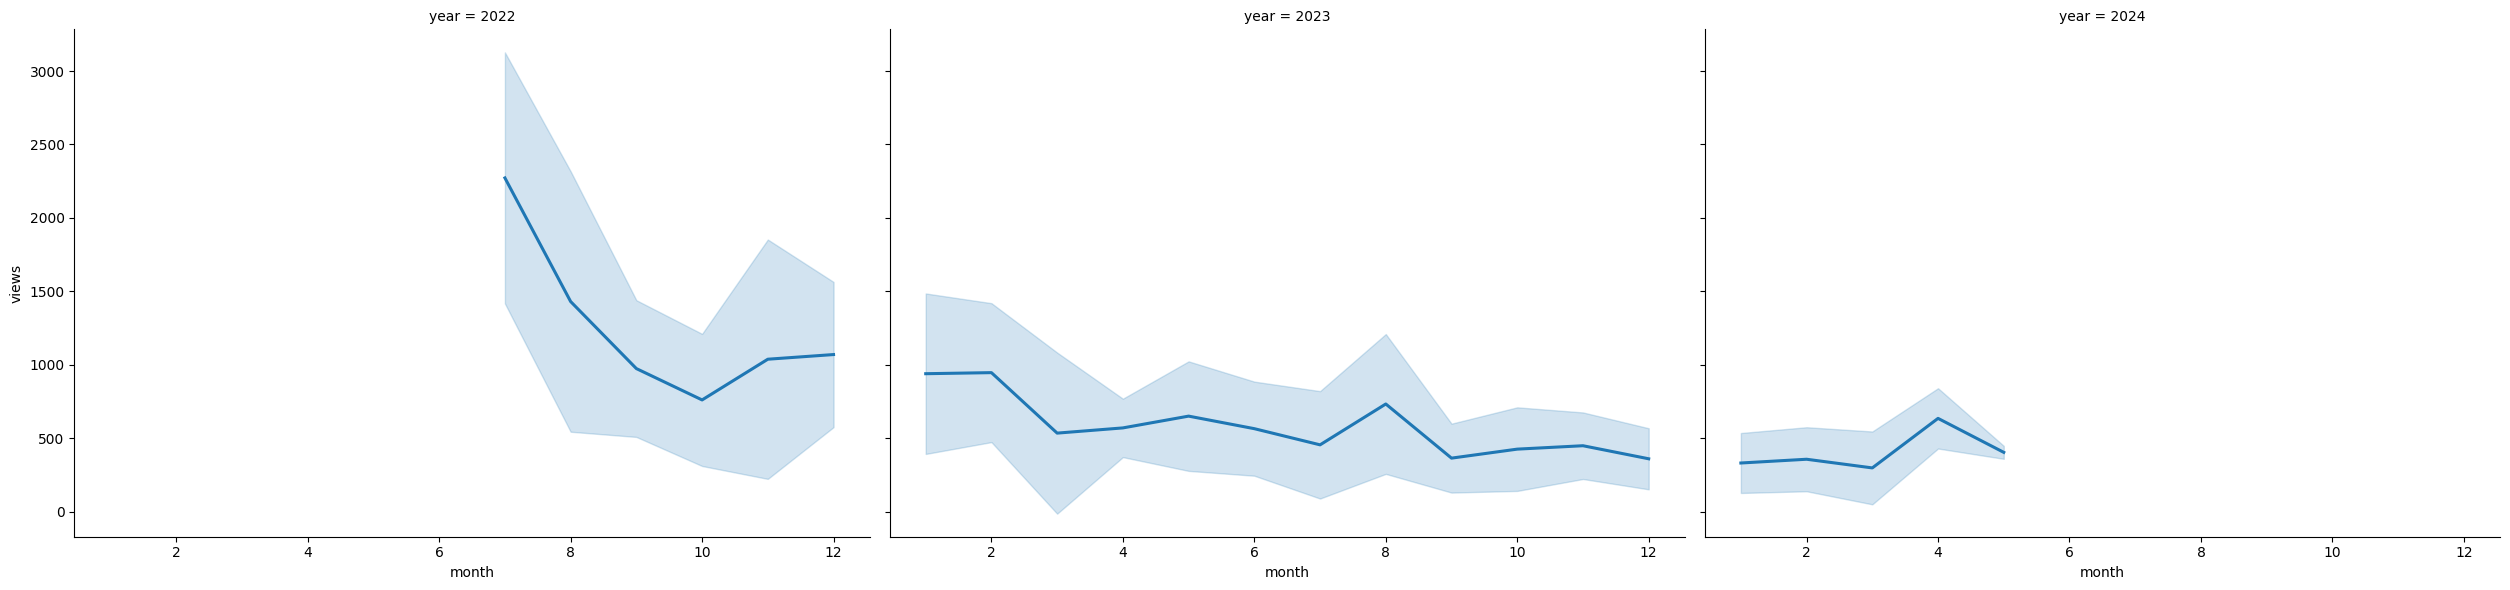

In [64]:
g = sns.relplot(
    x='month', y='views', col='year', kind='line', data=dfc,
    height=6, aspect=1.4, linewidth=2.2, errorbar='sd'
)
    
plt.show()

In [65]:
def plot_1o(df, clr='orange'):    
    g = sns.relplot(
        x='month', y=f'{yax}', col='year', kind='line', data=df,
        height=10, linewidth=4.2, aspect=1.4, color=f'{clr}', errorbar= 'ci'
    )

#     g.set_axis_labels("Month", "Views")
    g.set(xlabel="Month", ylabel=f"{yax}(K)")
    g.set_titles(col_template="{col_name}", size=k)
    
    for ax in g.axes.flat:
        ax.tick_params(axis='x', labelsize=k)  
        ax.tick_params(axis='y', labelsize=k) 
        ax.set_xlabel(ax.get_xlabel(), fontsize=k)
        ax.set_ylabel(ax.get_ylabel(), fontsize=k)
#         ax.set_ylim([-1, 4000])
        ax.set_xlim([1, 12])
    fig = g.fig
    fig.set_size_inches(19, 5)

    plt.show()
    
k = 30

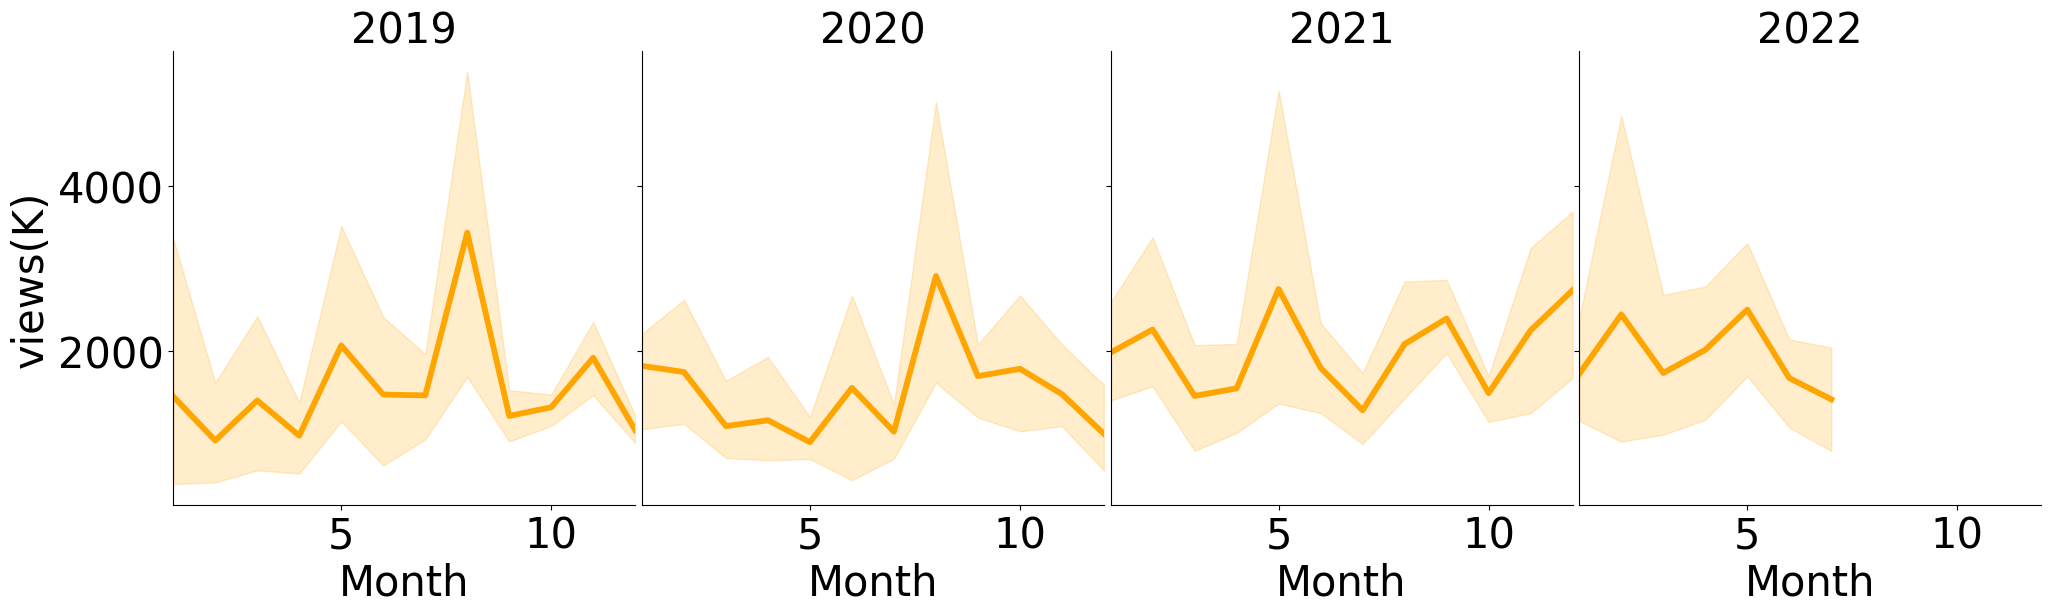

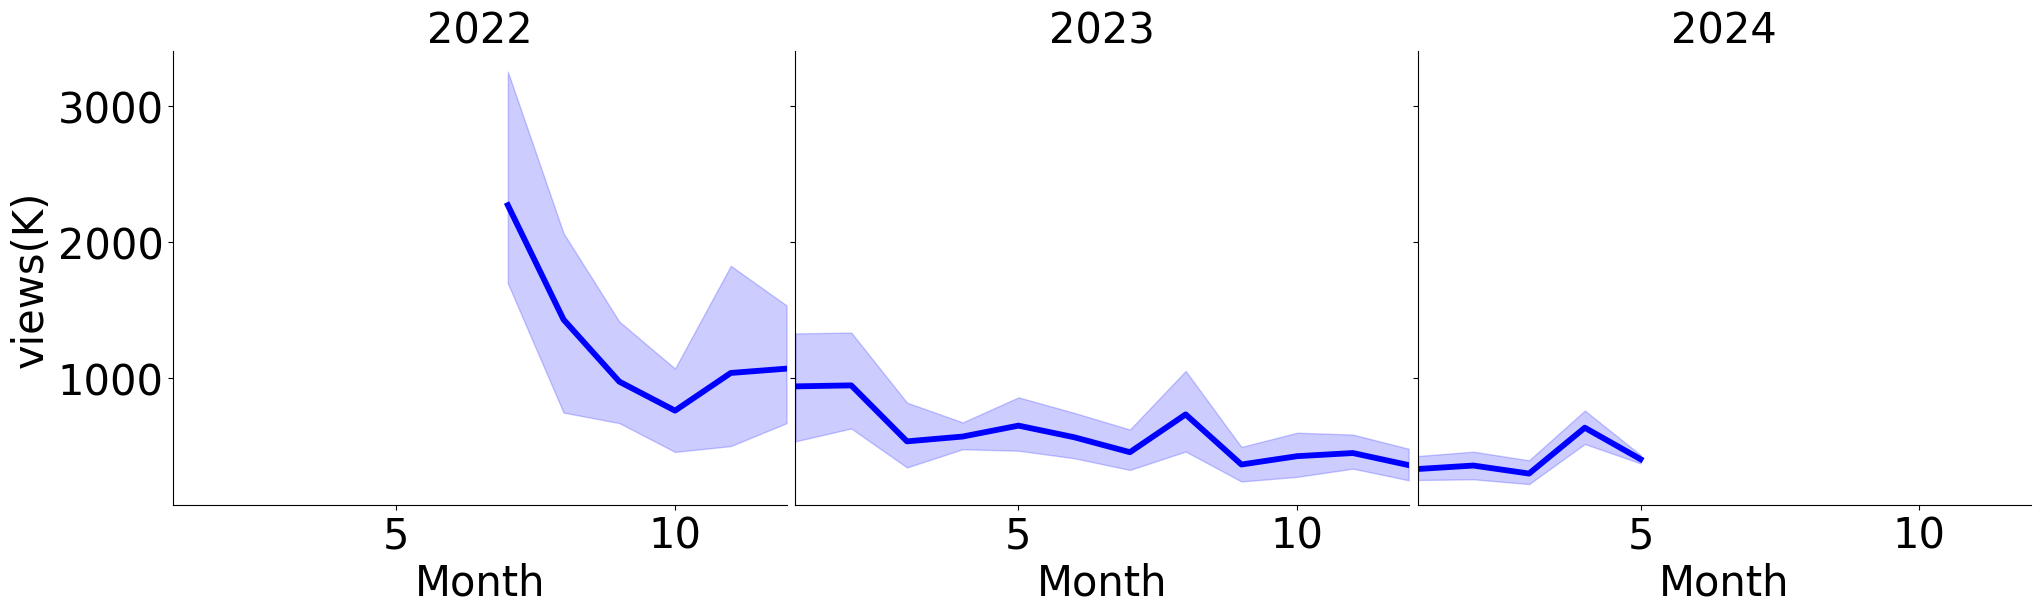

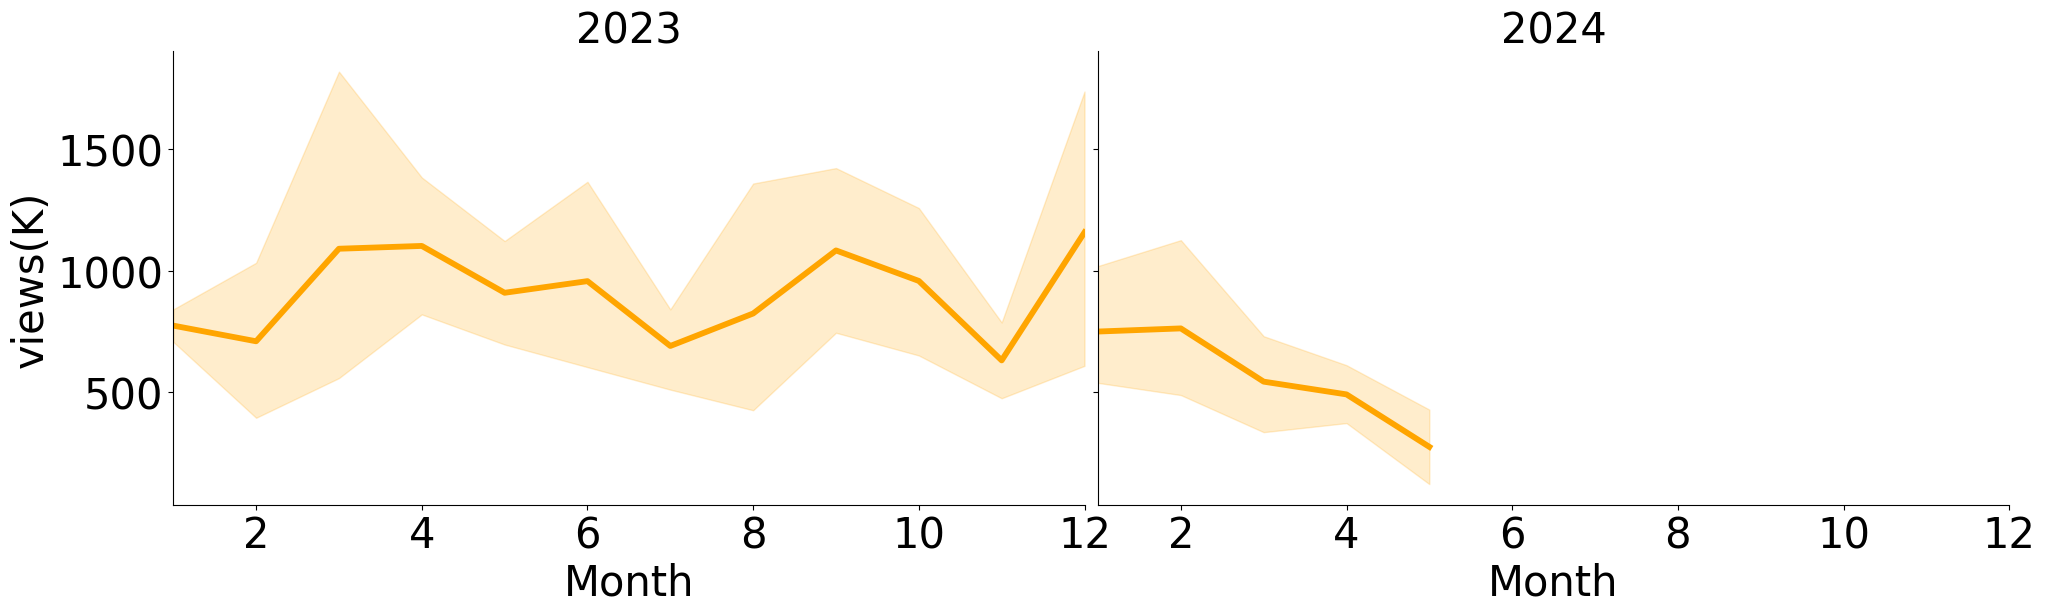

In [66]:
yax = 'views'
plot_1o(dfs)
plot_1o(dfc, clr='blue')
plot_1o(dft)

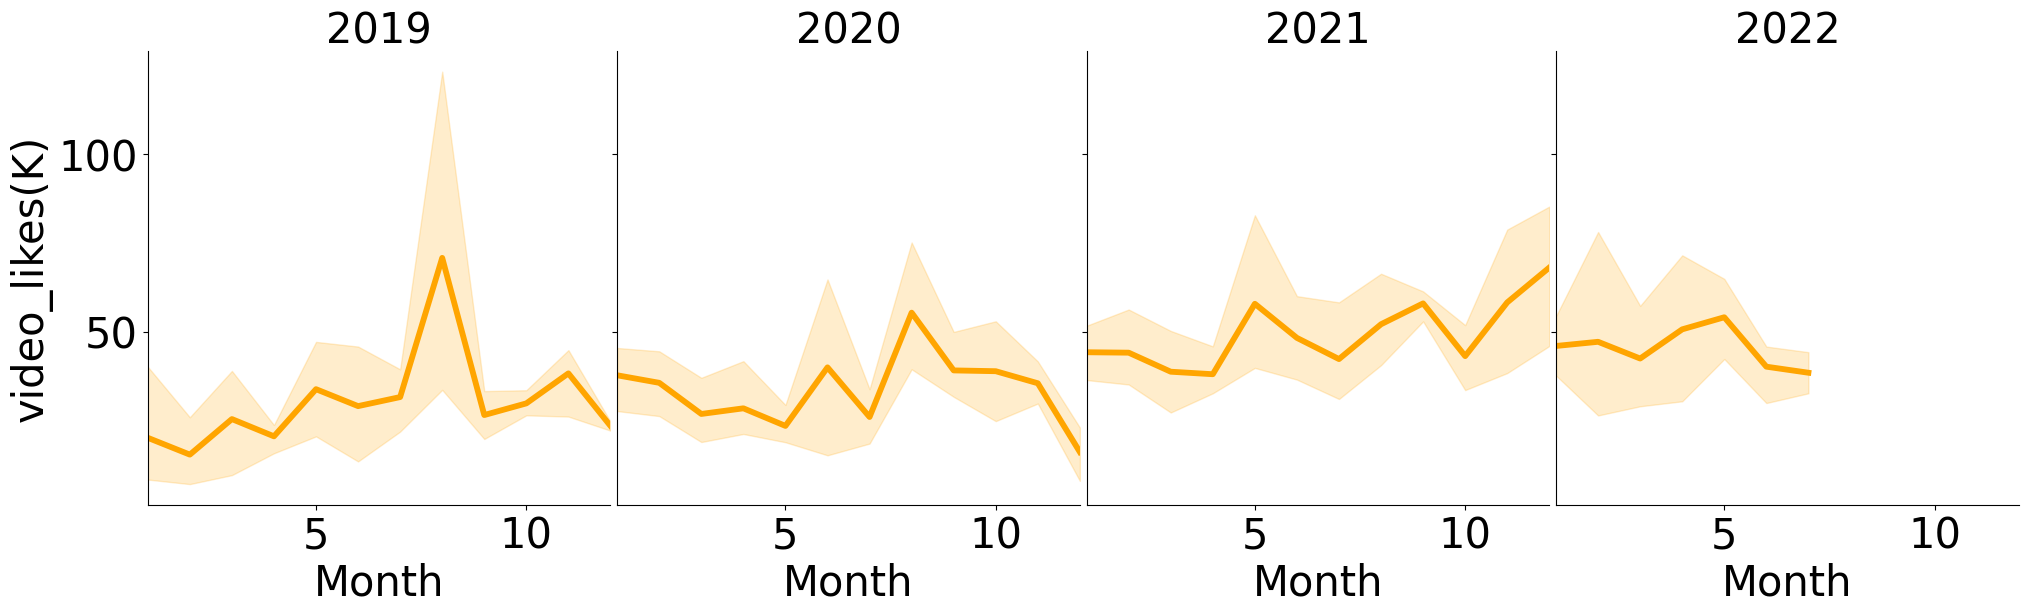

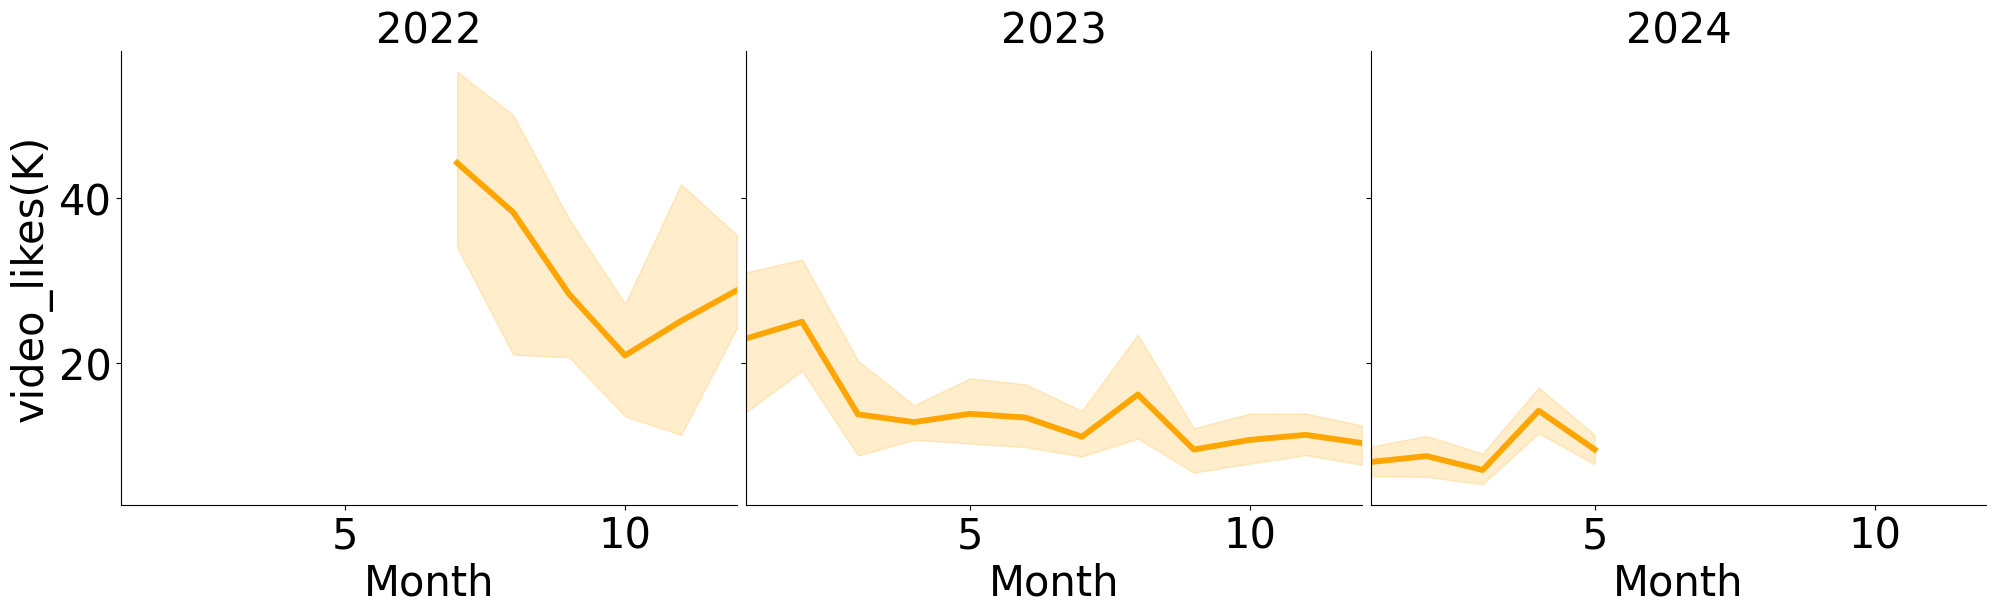

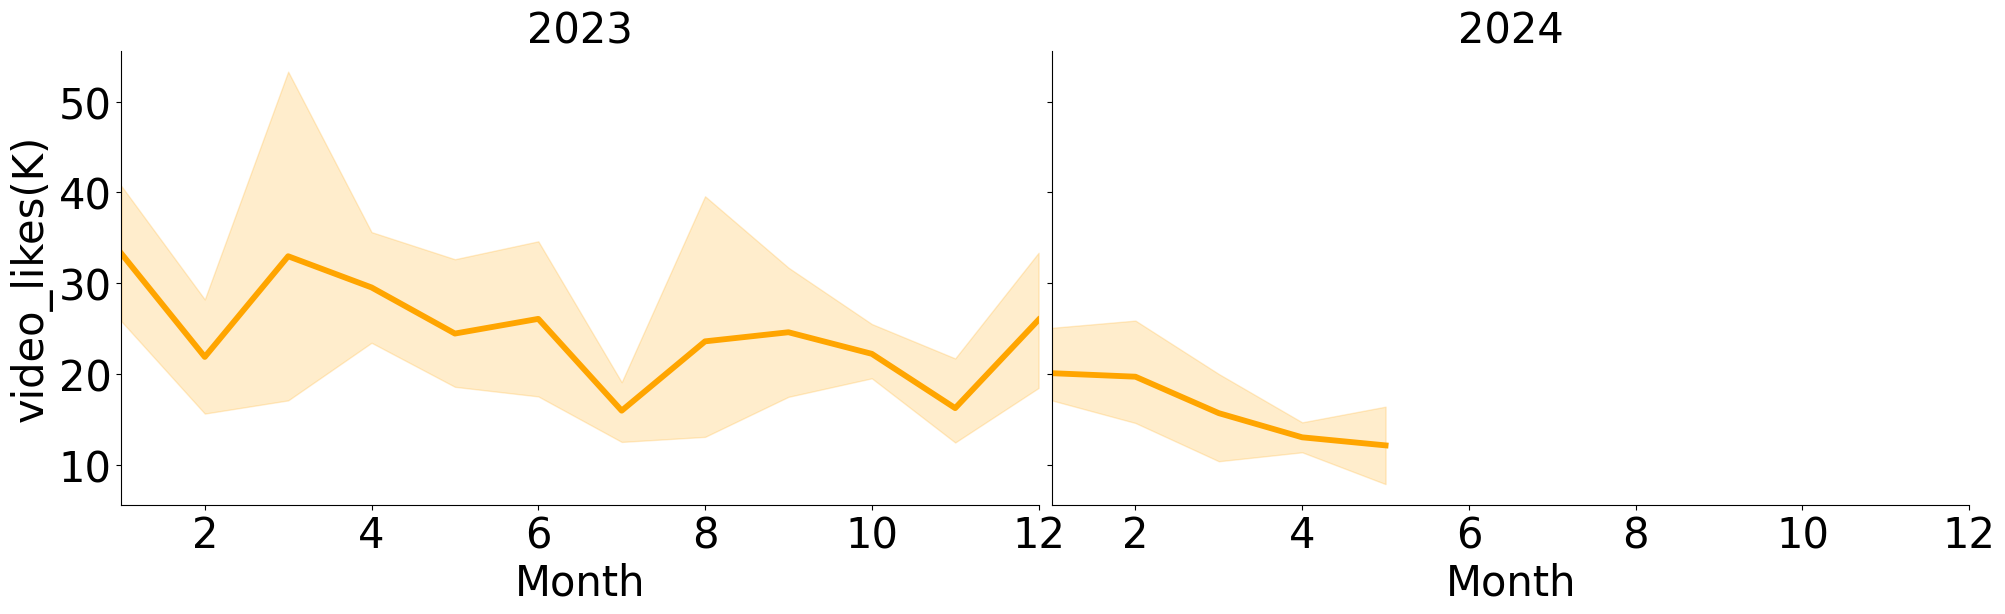

In [67]:
yax = 'video_likes'
plot_1o(dfs)
plot_1o(dfc)
plot_1o(dft)

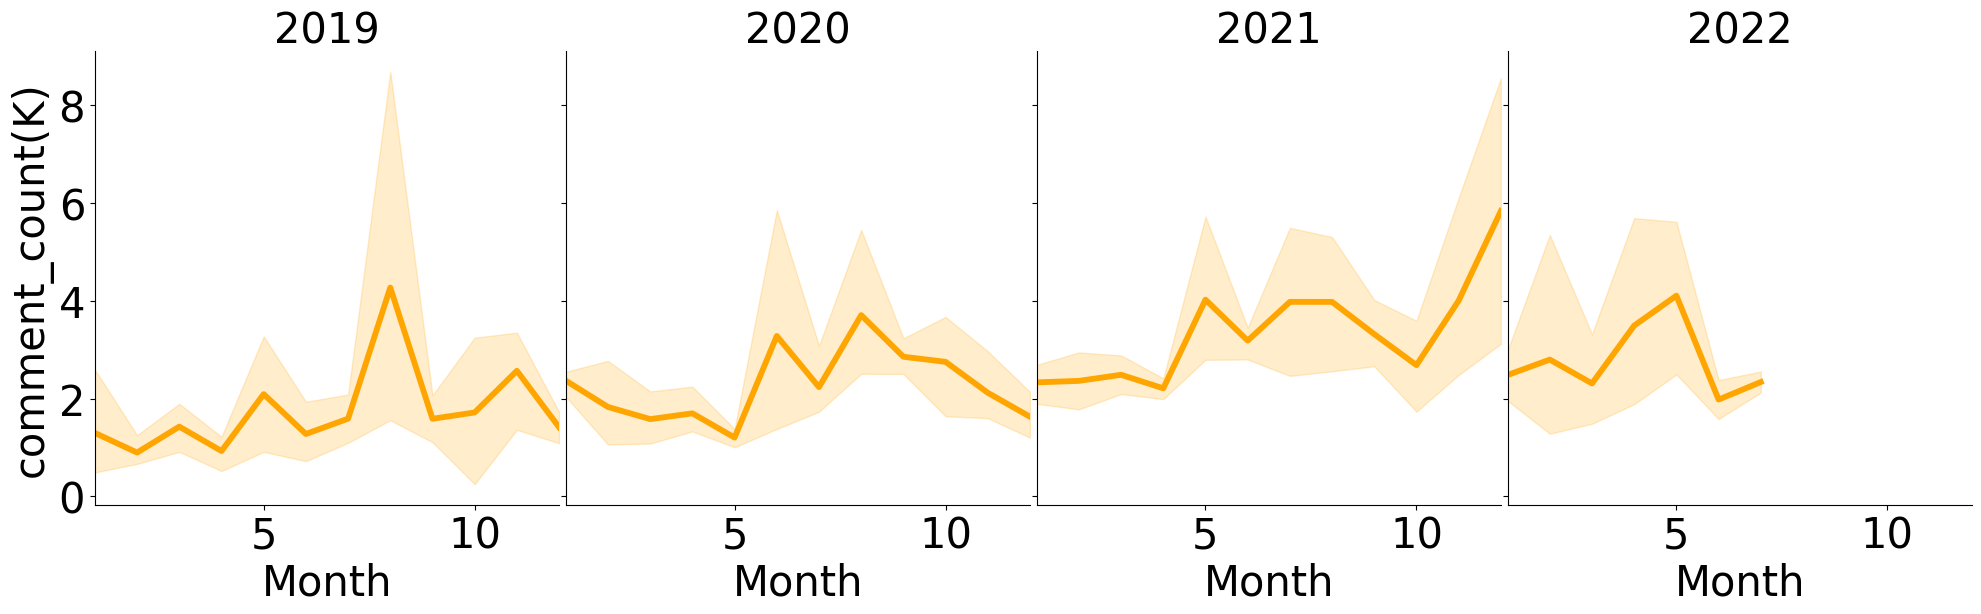

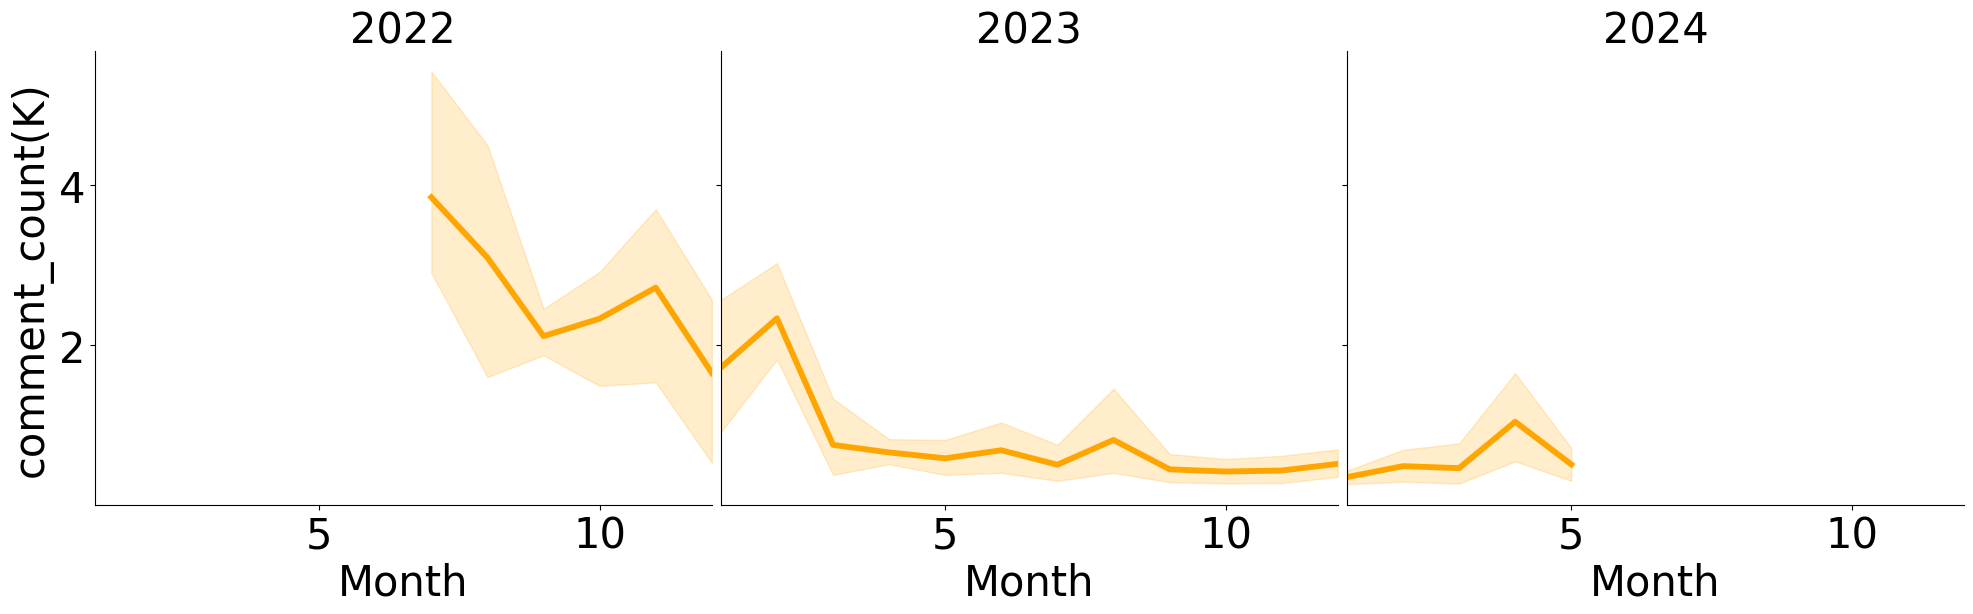

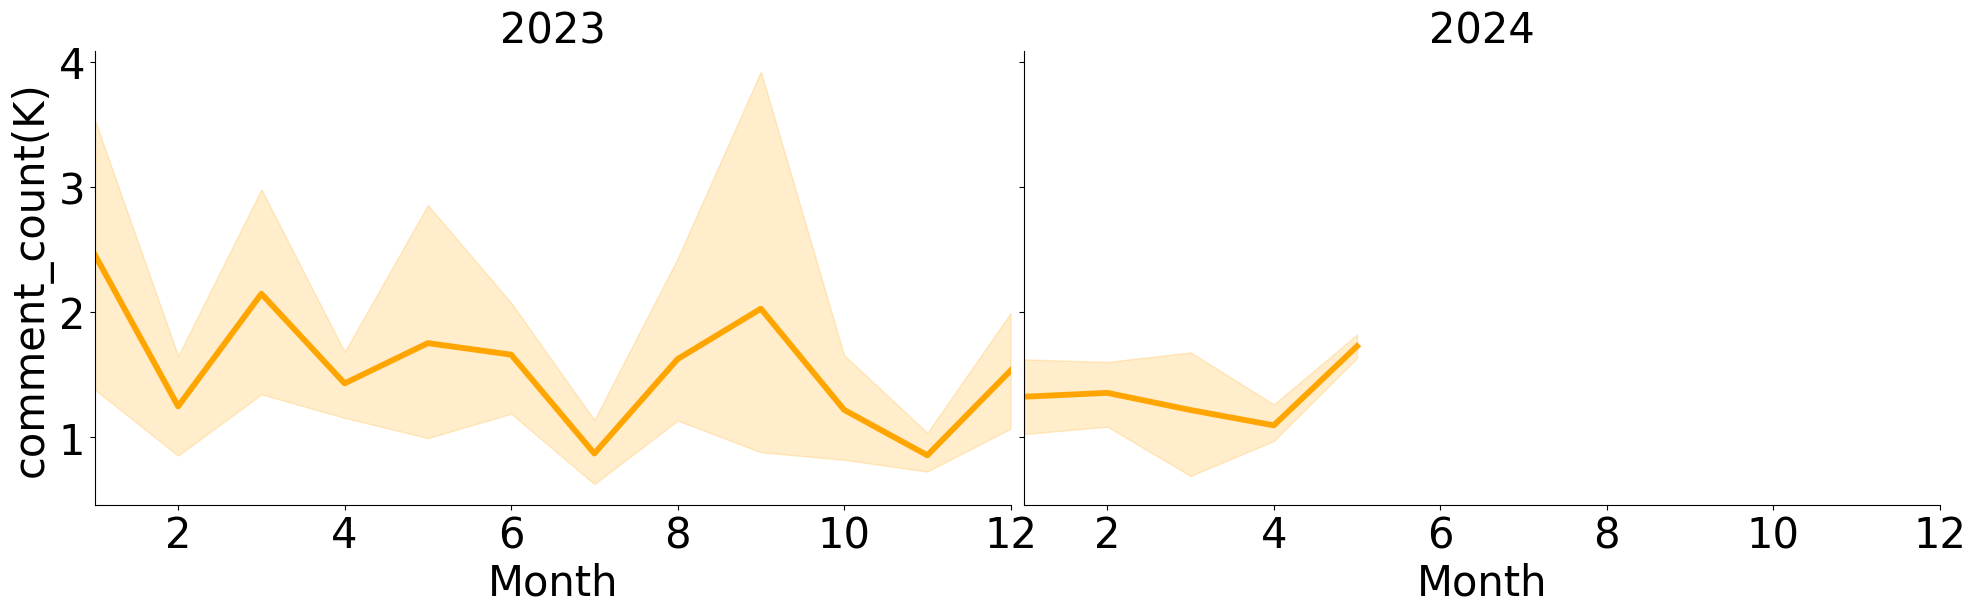

In [68]:
yax = 'comment_count'
plot_1o(dfs)
plot_1o(dfc)
plot_1o(dft)

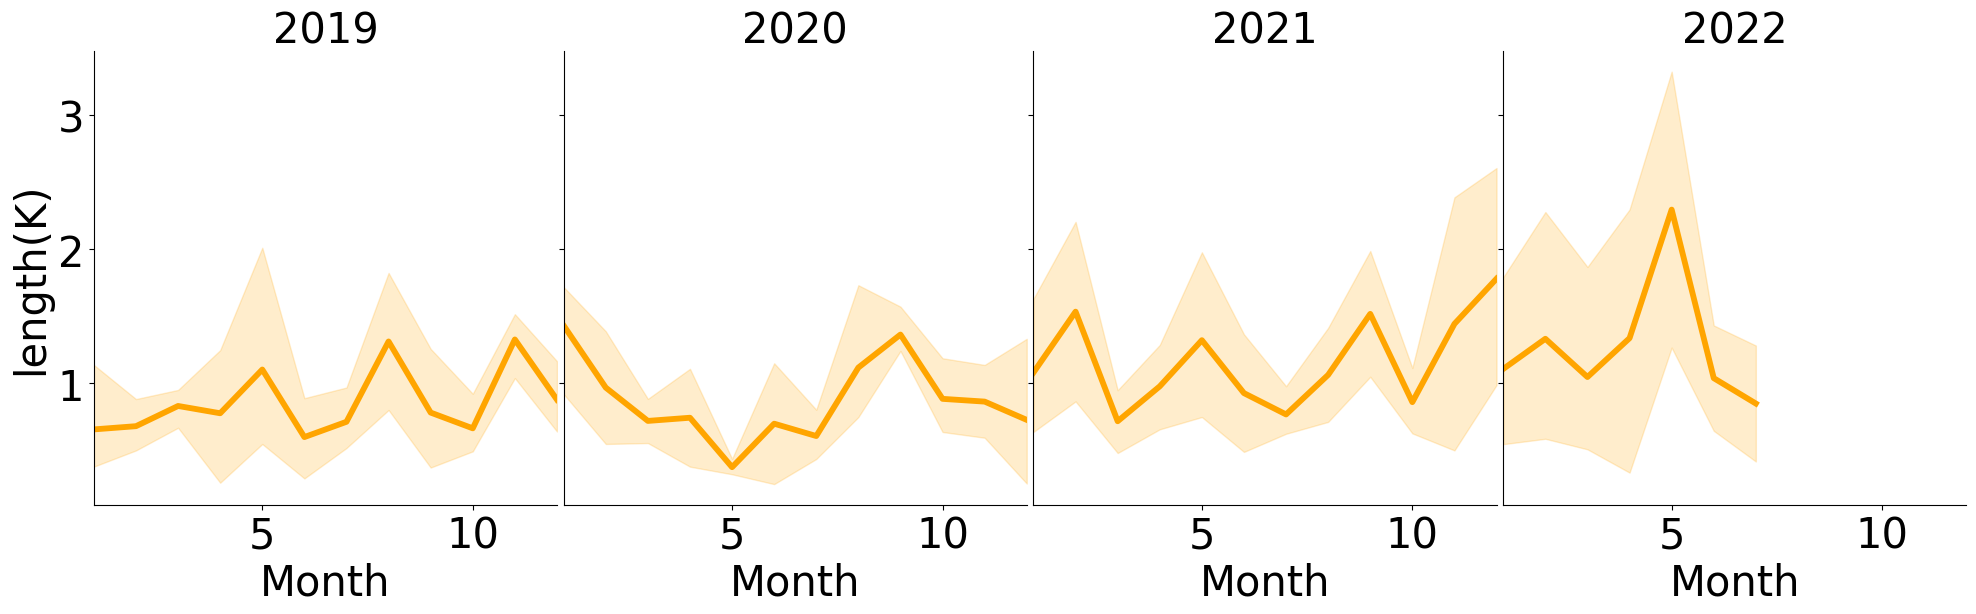

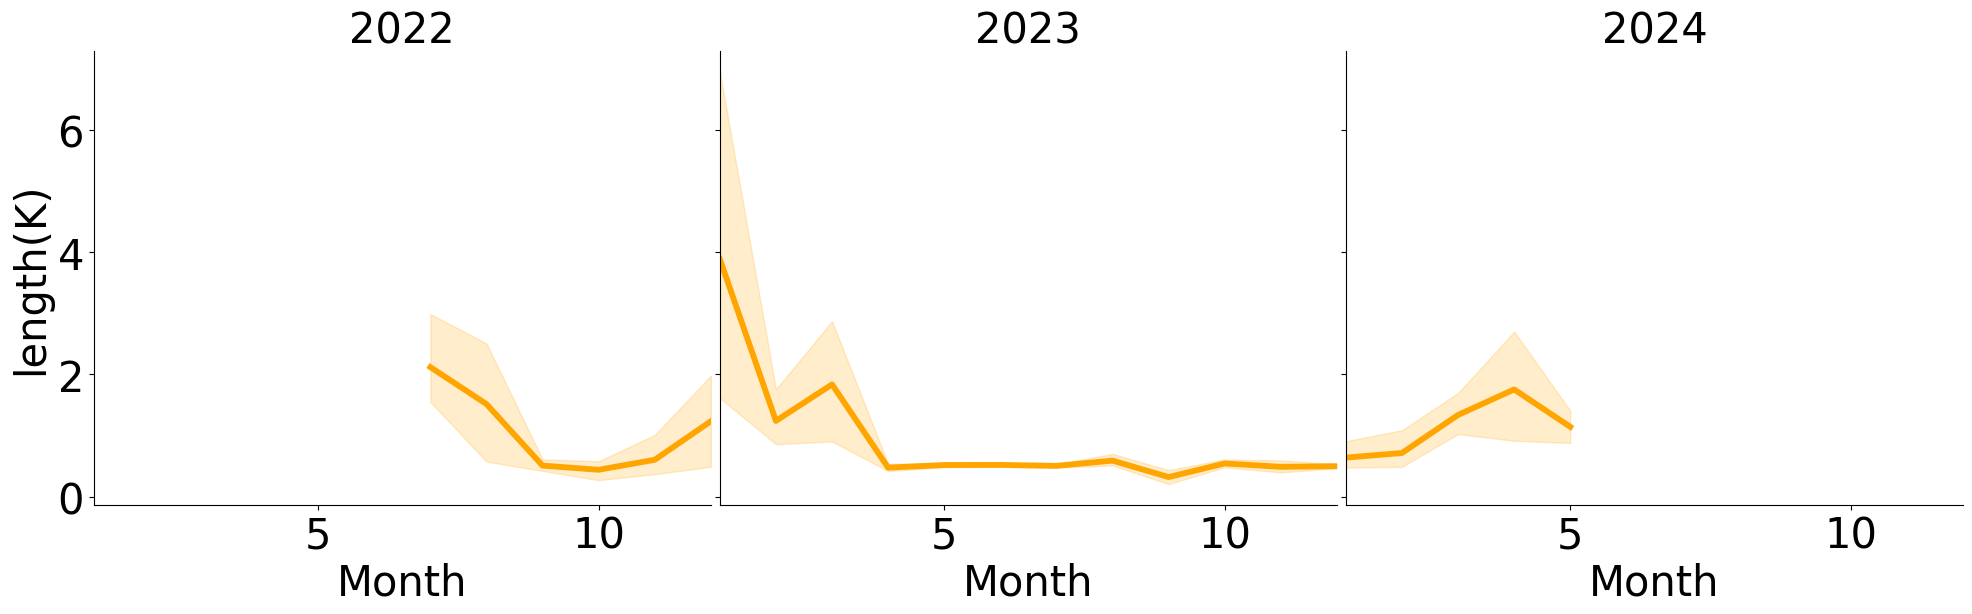

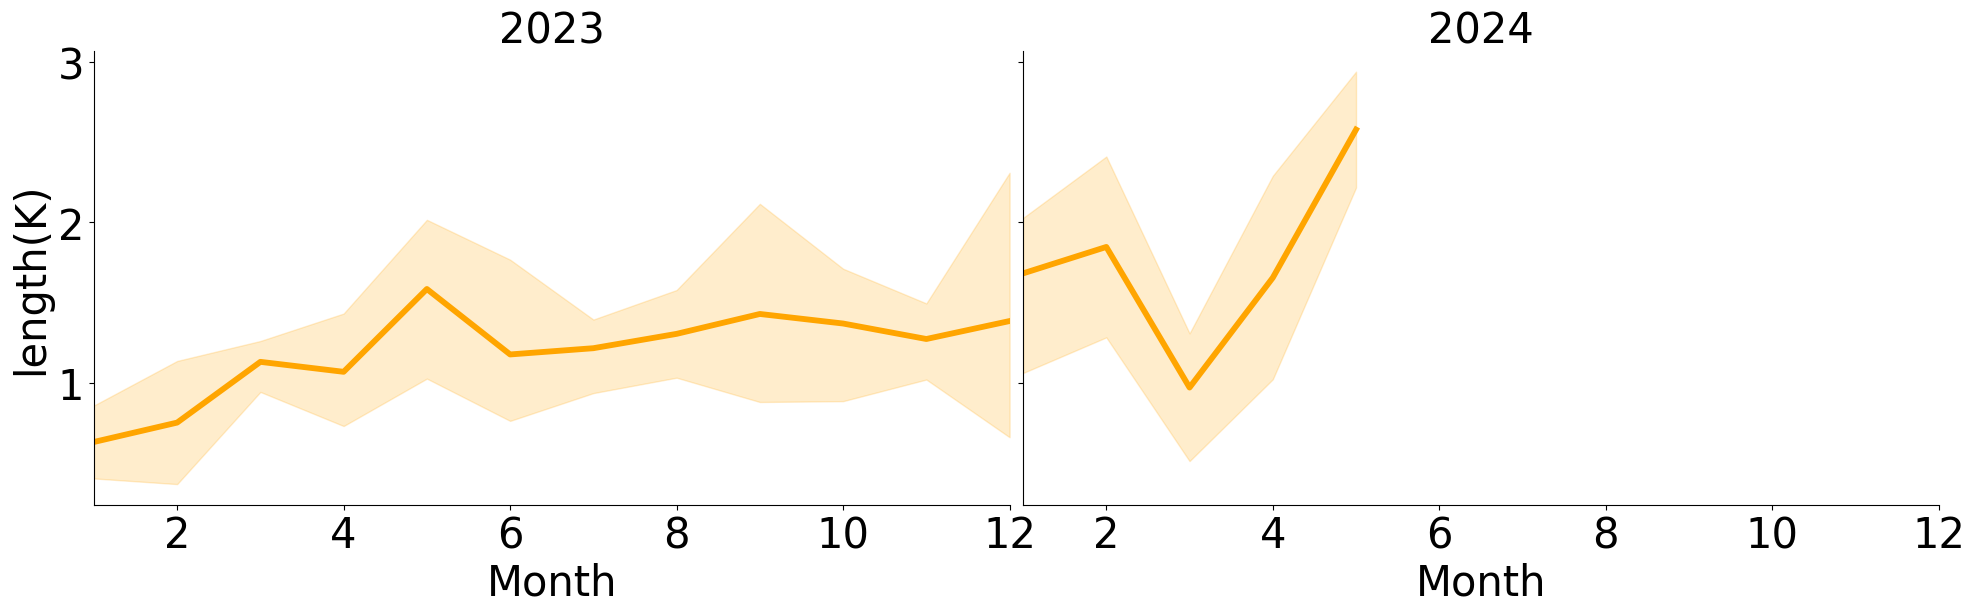

In [69]:
yax = 'length'
plot_1o(dfs)
plot_1o(dfc)
plot_1o(dft)

In [70]:
dfc.head()

title     views    length  \
0  Sunday Suspense | Professor Shonku | Compu | S...   434.508  0.877500   
1  Sunday Suspense Classics | Satyajit Ray Storie...   372.088  1.406111   
2  Sunday Suspense | Chowdhury Barir Rahasya | Ab...  1044.481  4.496667   
3  Sunday Suspense Classics | Bibhutibhushan Band...   541.792  0.747778   
4  Sunday Suspense | Neel Arshola | Himadri Kisho...   596.493  0.650556   

                                           url     video_id  comment_count  \
0  https://www.youtube.com/watch?v=SgqeN_FUprg  SgqeN_FUprg          0.715   
1  https://www.youtube.com/watch?v=w6a9wvFugT4  w6a9wvFugT4          0.304   
2  https://www.youtube.com/watch?v=hF6XlcgnE10  hF6XlcgnE10          2.539   
3  https://www.youtube.com/watch?v=TnIk0dbrD04  TnIk0dbrD04          0.327   
4  https://www.youtube.com/watch?v=8pac77058GA  8pac77058GA          1.250   

   video_likes       date      time  year  month  day  
0       11.275 2024-05-05  07:30:06  2024      5    5  
1        7.689 2024-05-04  16:30:07  2024      5    4  
2       22.110 2024-04-28  09:23:41  2024      4   28  
3       12.246 2024-04-27  16:30:08  2024      4   27  
4       15.100 2024-04-21  07:30:07  2024      4   21

## Correlation's Heatmap:

Visualizes the correlation matrix, making it easier to spot strong correlations.

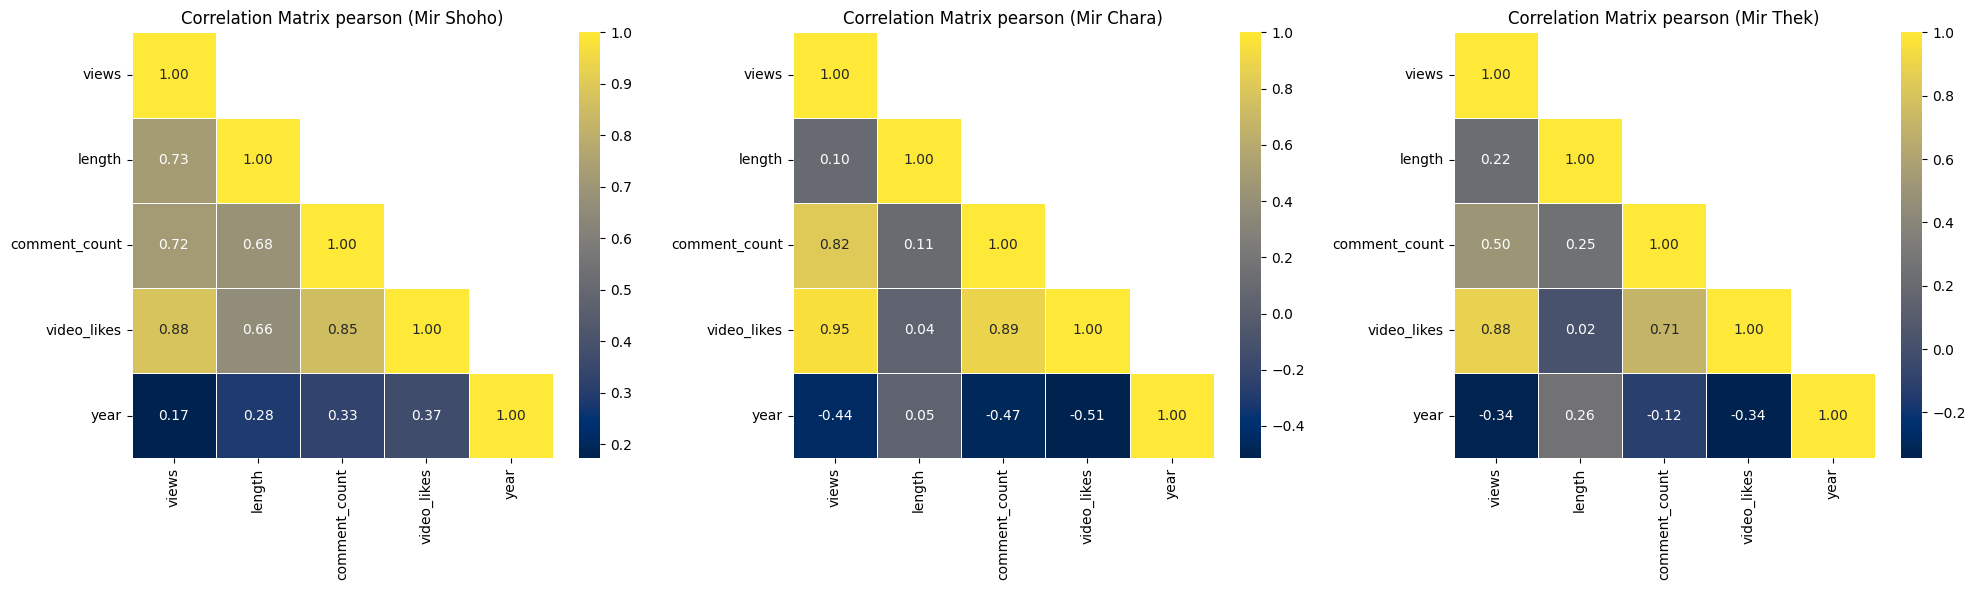

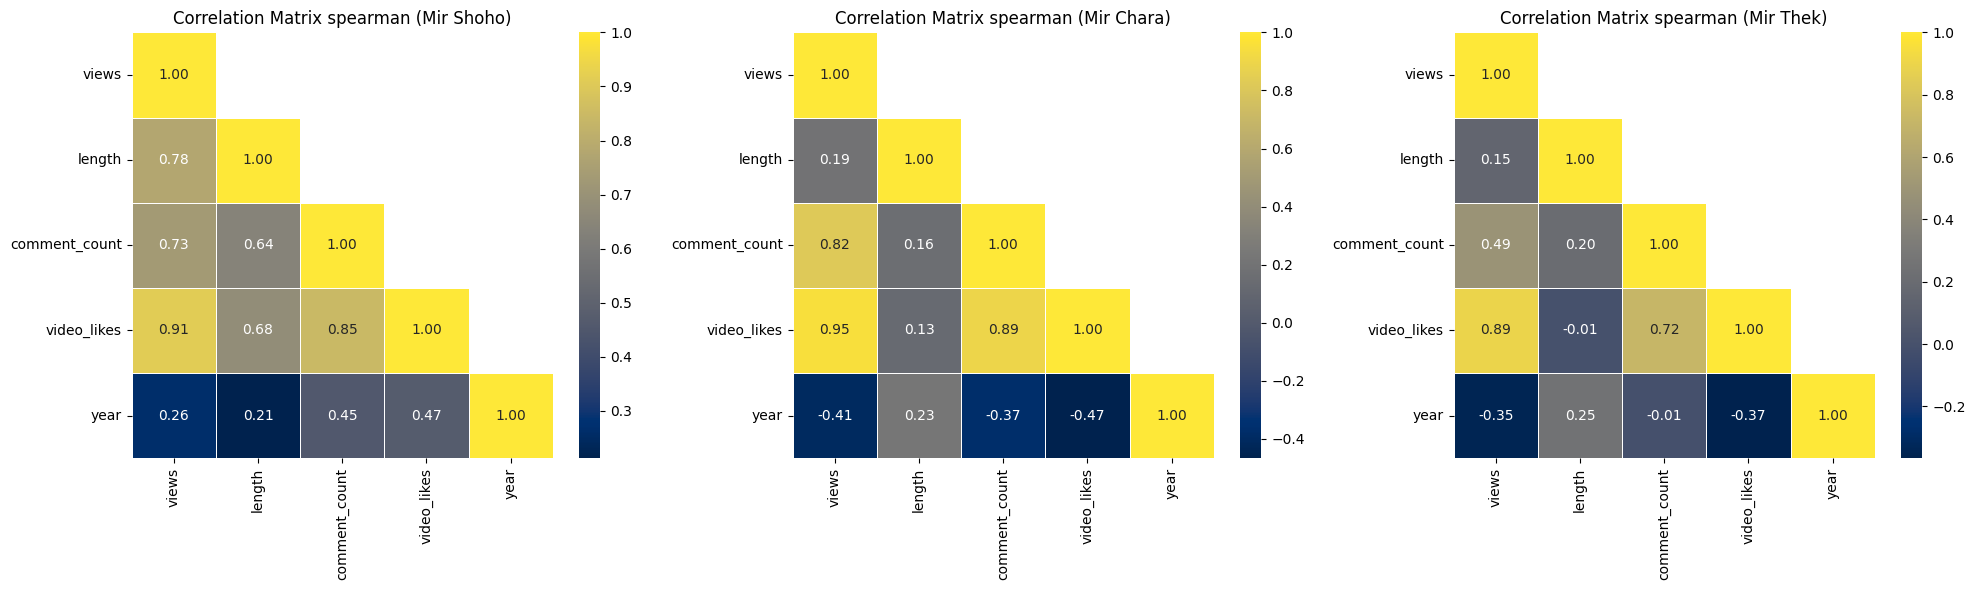

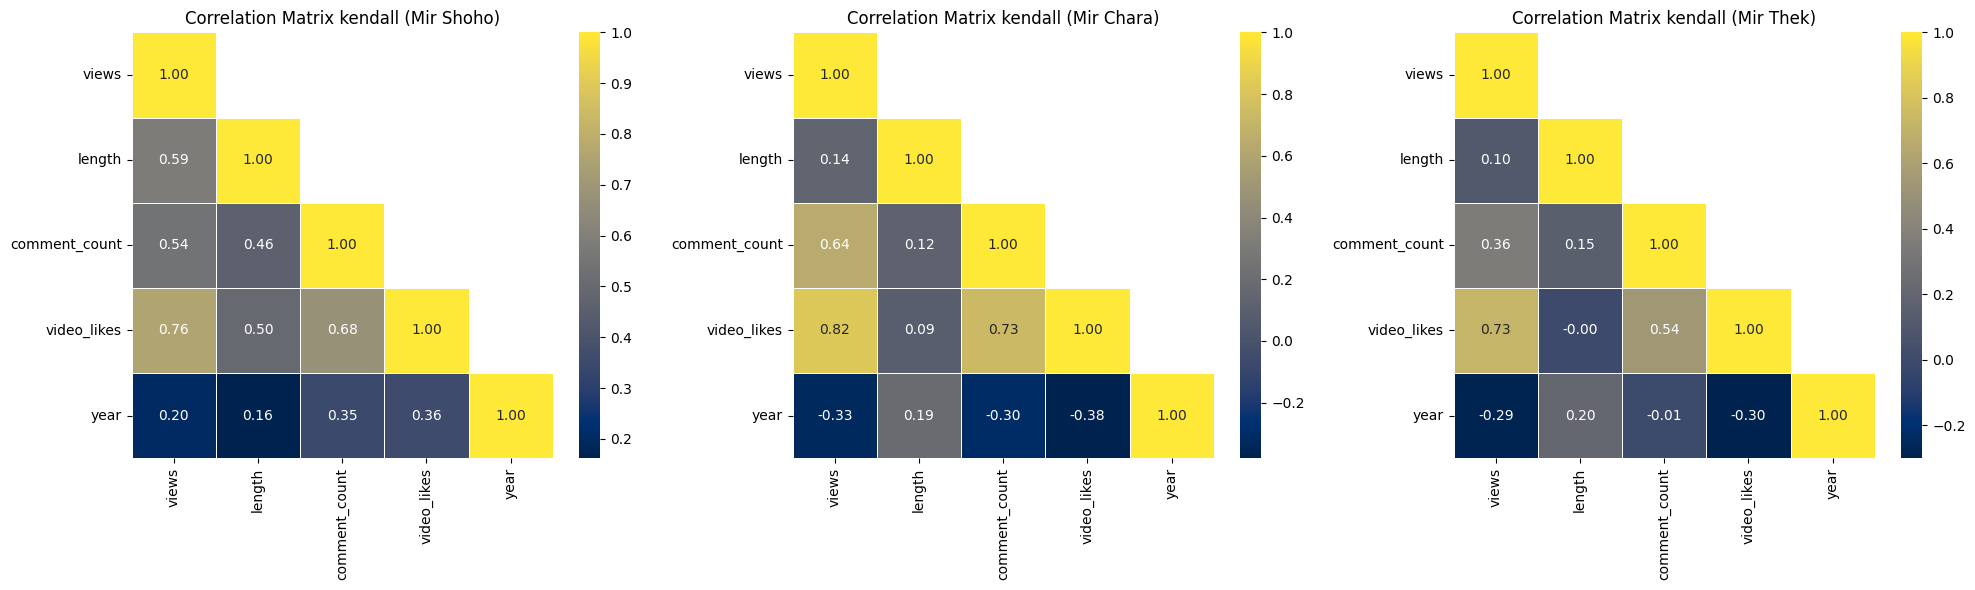

In [71]:
numerical_cols = ['views', 'length', 'comment_count', 'video_likes', 'year']

def plot_3o(typ, cmap='magma'):
    # Compute the correlation matrix
    corr_matrix = dfs[numerical_cols].corr(method=f'{typ}')
    mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix_upper = corr_matrix.mask(~mask)
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    sns.heatmap(corr_matrix_upper, annot=True, cmap=f'{cmap}', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix {typ} (Mir Shoho)')

    # Compute the correlation matrix
    corr_matrix = dfc[numerical_cols].corr(method=f'{typ}')

    # Create a mask for the upper triangle
    mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

    # Apply the mask to the correlation matrix
    corr_matrix_upper = corr_matrix.mask(~mask)
    plt.subplot(1, 3, 2)
    sns.heatmap(corr_matrix_upper, annot=True, cmap=f'{cmap}', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix {typ} (Mir Chara)')


    # Compute the correlation matrix
    corr_matrix = dft[numerical_cols].corr(method=f'{typ}')

    # Create a mask for the upper triangle
    mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

    # Apply the mask to the correlation matrix
    corr_matrix_upper = corr_matrix.mask(~mask)
    plt.subplot(1, 3, 3)
    sns.heatmap(corr_matrix_upper, annot=True, cmap=f'{cmap}', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix {typ} (Mir Thek)')

    plt.tight_layout()
    plt.show()
    

plot_3o(typ='pearson', cmap='cividis')
plot_3o(typ='spearman', cmap='cividis')
plot_3o(typ='kendall', cmap='cividis')

## Scatter Plot Matrix:

* Visualizes pairwise relationships in a dataset.
* Helps to identify potential non-linear relationships and outliers.

In [72]:
dfc.head(2)

title    views    length  \
0  Sunday Suspense | Professor Shonku | Compu | S...  434.508  0.877500   
1  Sunday Suspense Classics | Satyajit Ray Storie...  372.088  1.406111   

                                           url     video_id  comment_count  \
0  https://www.youtube.com/watch?v=SgqeN_FUprg  SgqeN_FUprg          0.715   
1  https://www.youtube.com/watch?v=w6a9wvFugT4  w6a9wvFugT4          0.304   

   video_likes       date      time  year  month  day  
0       11.275 2024-05-05  07:30:06  2024      5    5  
1        7.689 2024-05-04  16:30:07  2024      5    4

In [73]:
# sns.set_palette('muted')

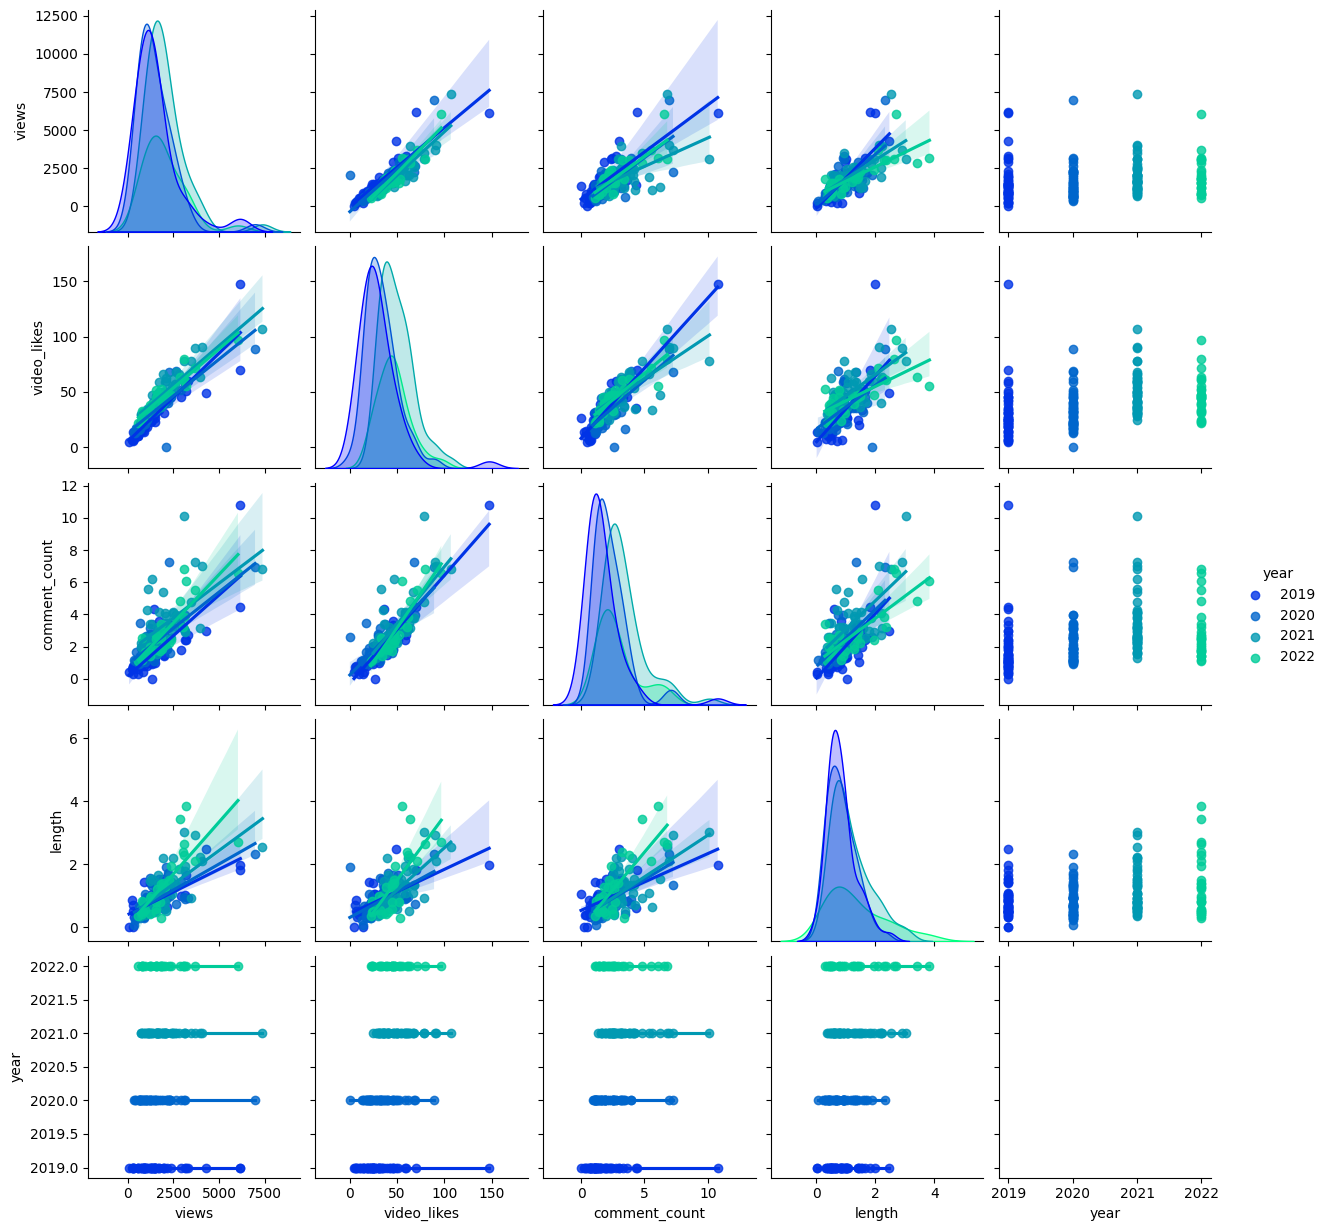

In [74]:
sns.pairplot(dfs, hue='year', vars=['views', 'video_likes', 'comment_count', 'length', 'year'],
             kind='reg', palette='winter', diag_kind='kde')
plt.show()

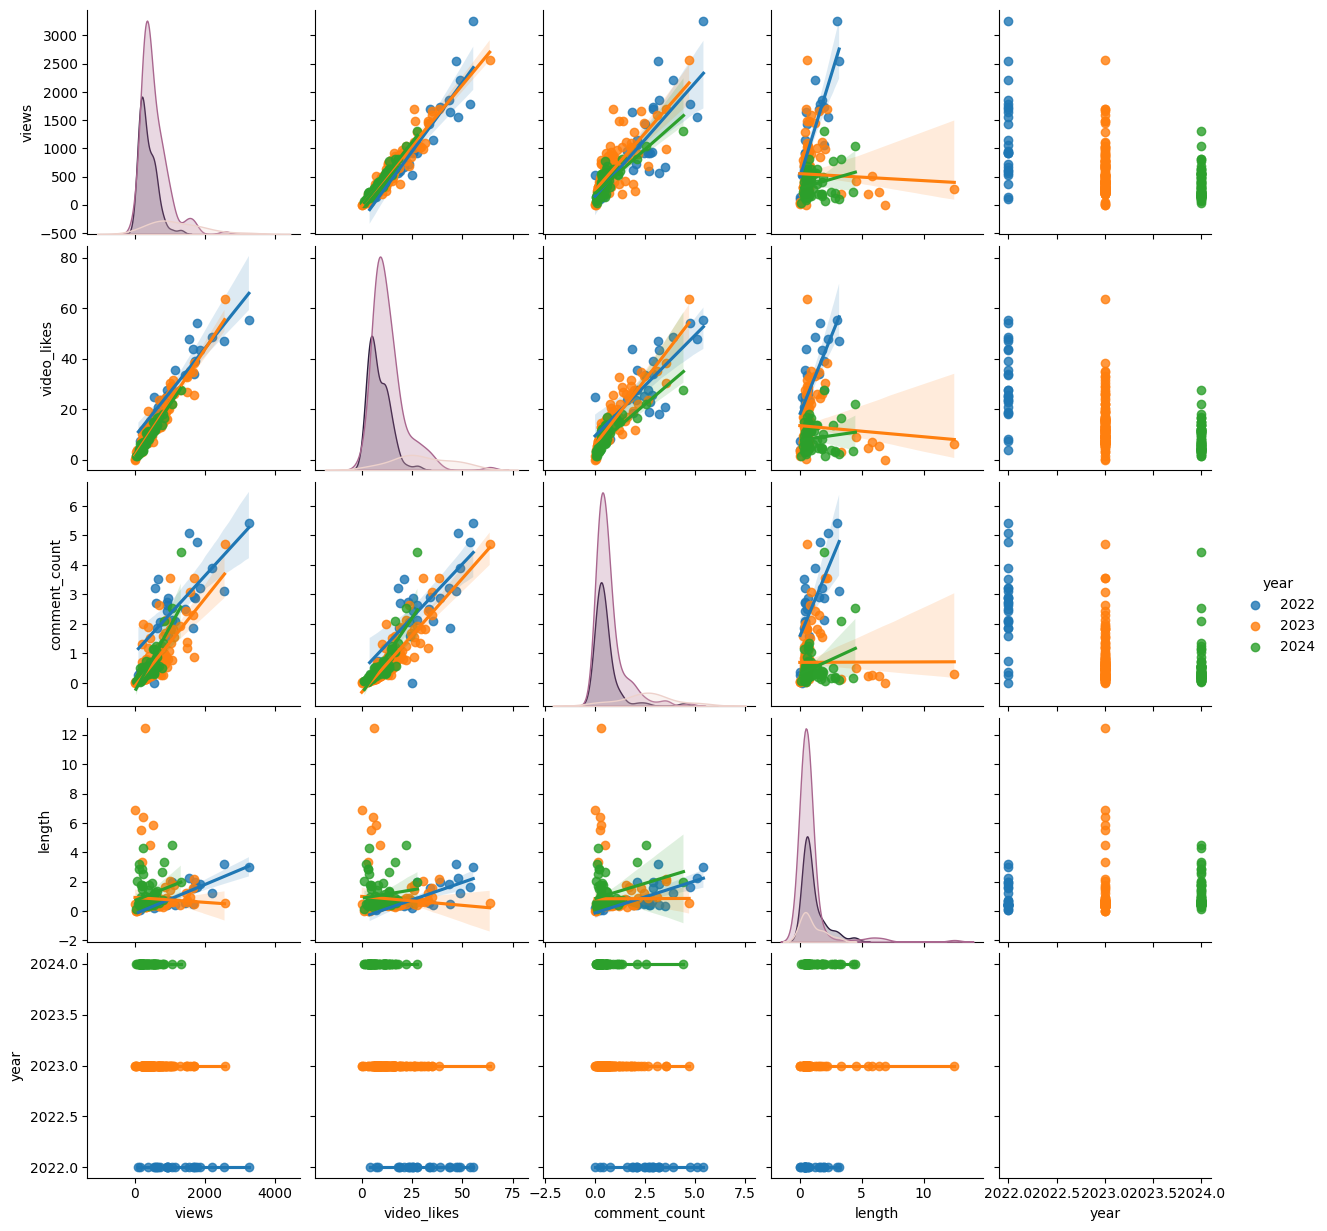

In [75]:
default_palette = sns.color_palette()
sns.pairplot(dfc, hue='year', vars=['views', 'video_likes', 'comment_count', 'length', 'year'],
             kind='reg', diag_kind='auto')
plt.show()

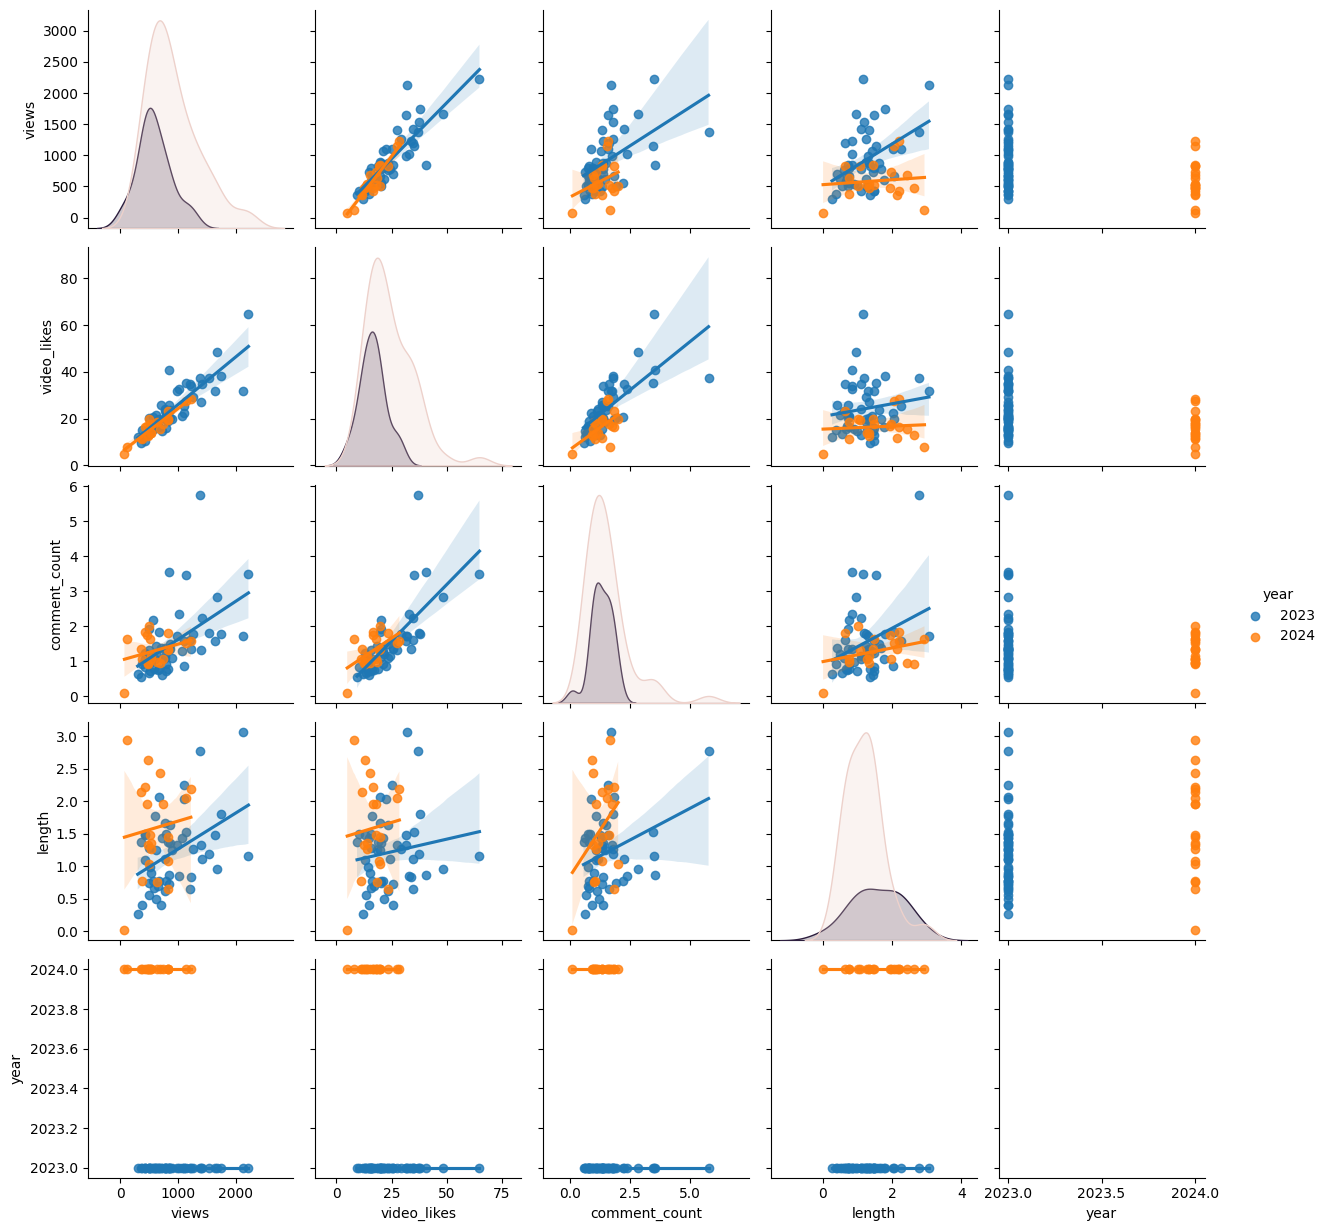

In [76]:
sns.pairplot(dft, hue='year', vars=['views', 'video_likes', 'comment_count', 'length', 'year'],
             kind='reg', diag_kind='auto')
plt.show()

In [77]:
def plot_2o(yax, cmapp='cividis'):    
    k = 14
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(21, 7))

    # Plot the first DataFrame
    sns.lineplot(data=dfs, x='month', y=f'{yax}', hue='year', palette=f'{cmapp}', ax=axes[0],
                 errorbar='sd',err_style='band', linewidth=3)
    axes[0].set_title("\nMir Shoho - \n", fontsize=20)

    # Plot the second DataFrame
    sns.lineplot(data=dfc, x='month', y=f'{yax}', hue='year', palette=f'{cmapp}', ax=axes[1],
                 errorbar='sd', err_style='band', err_kws={'alpha': 0.09}, linewidth=2.5)
    axes[1].set_title("\nMir Chara - \n", fontsize=20)

    # Plot the second DataFrame
    sns.lineplot(data=dft, x='month', y=f'{yax}', hue='year', palette=f'{cmapp}', ax=axes[2],
                 errorbar='sd', err_style='band', err_kws={'alpha': 0.09}, linewidth=3)
    axes[2].set_title("\nMir Thek - \n", fontsize=20)

    # Set y-axis limits to be the same for both subplots
    combined_y_max = max(dfc[f'{yax}'].max(), dfs[f'{yax}'].max())
    combined_y_min = min(dfc[f'{yax}'].min(), dfs[f'{yax}'].min())

    for ax in axes:
        ax.set_ylim([combined_y_min, combined_y_max])
        ax.tick_params(axis='x', labelsize=k)  
        ax.tick_params(axis='y', labelsize=k) 
        ax.set_xlabel(ax.get_xlabel(), fontsize=k)
        ax.set_ylabel(ax.get_ylabel(), fontsize=k)
        ax.legend(fontsize=15)
    # Display the plot
    plt.tight_layout()
    plt.show()

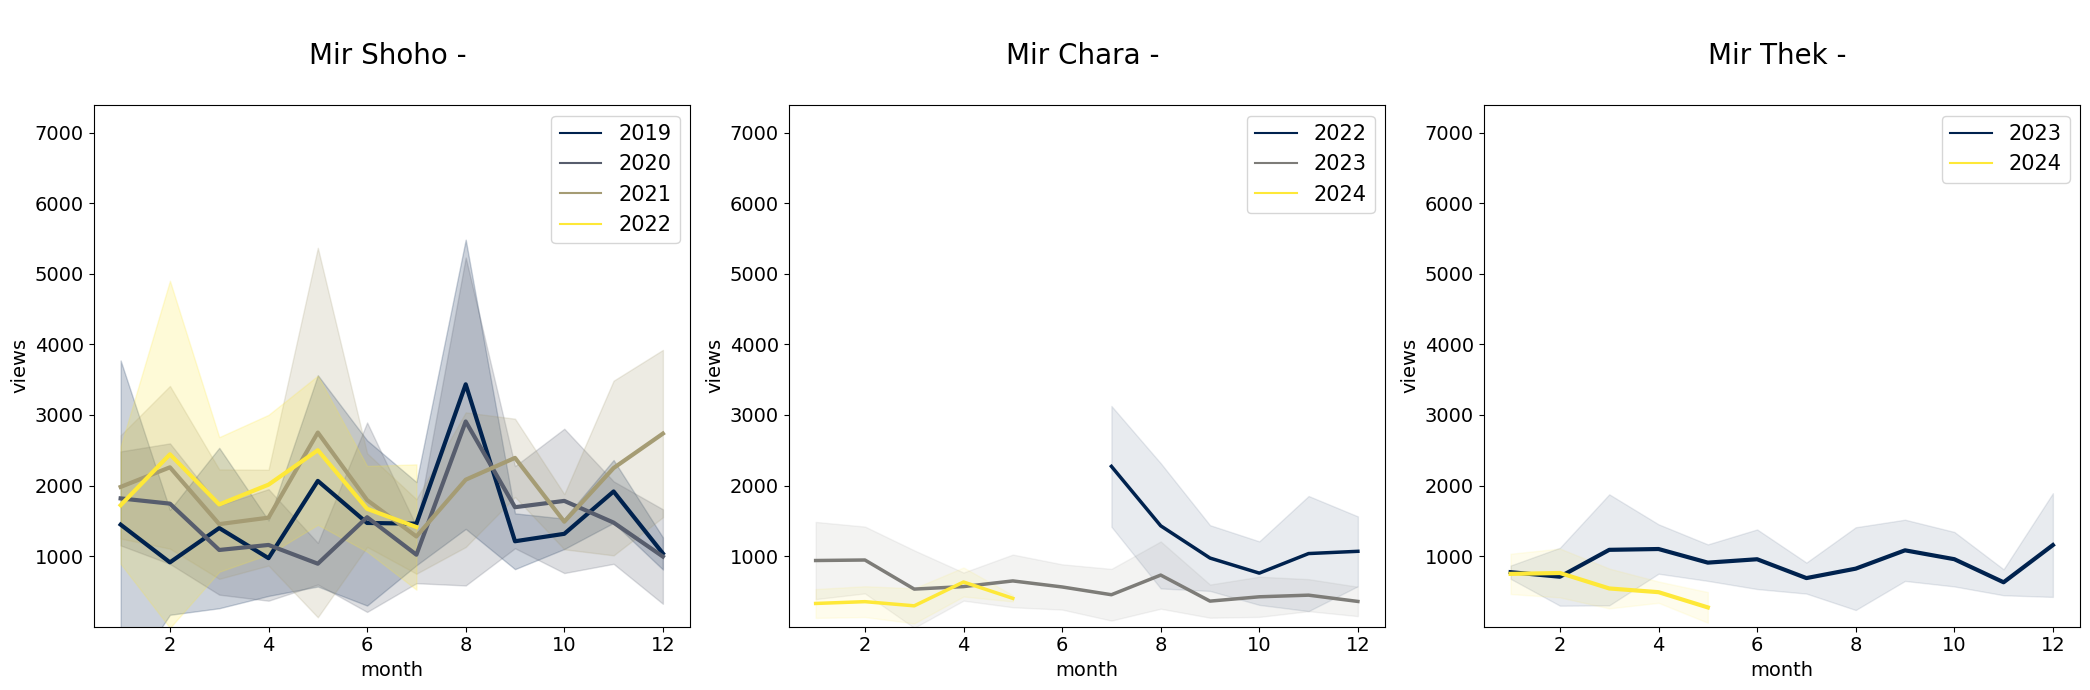

In [78]:
plot_2o('views')

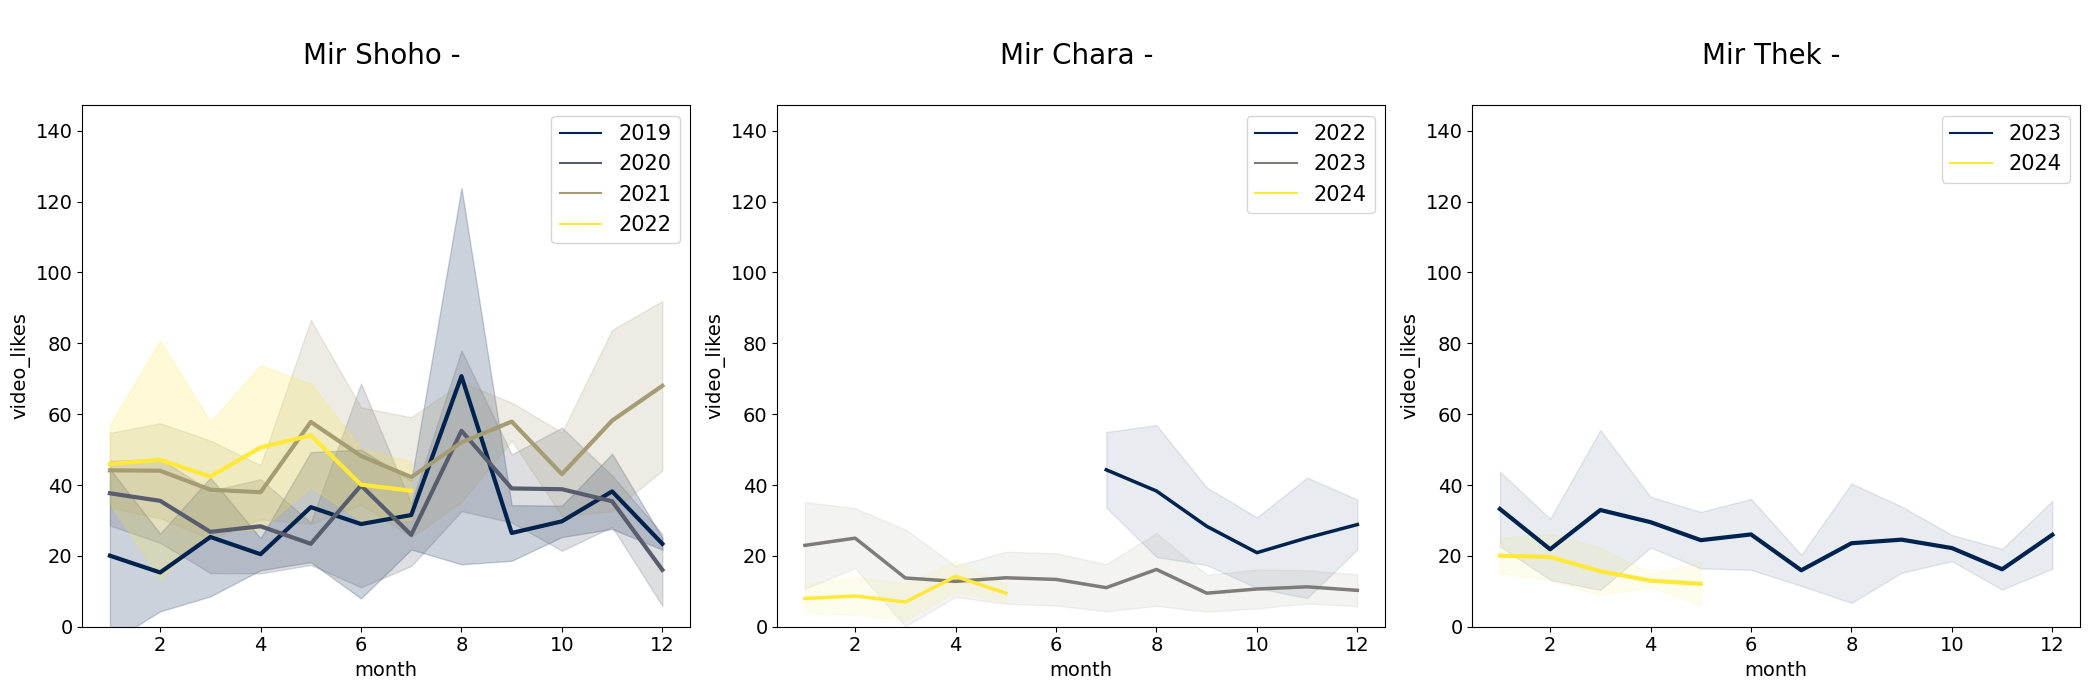

In [79]:
plot_2o('video_likes')

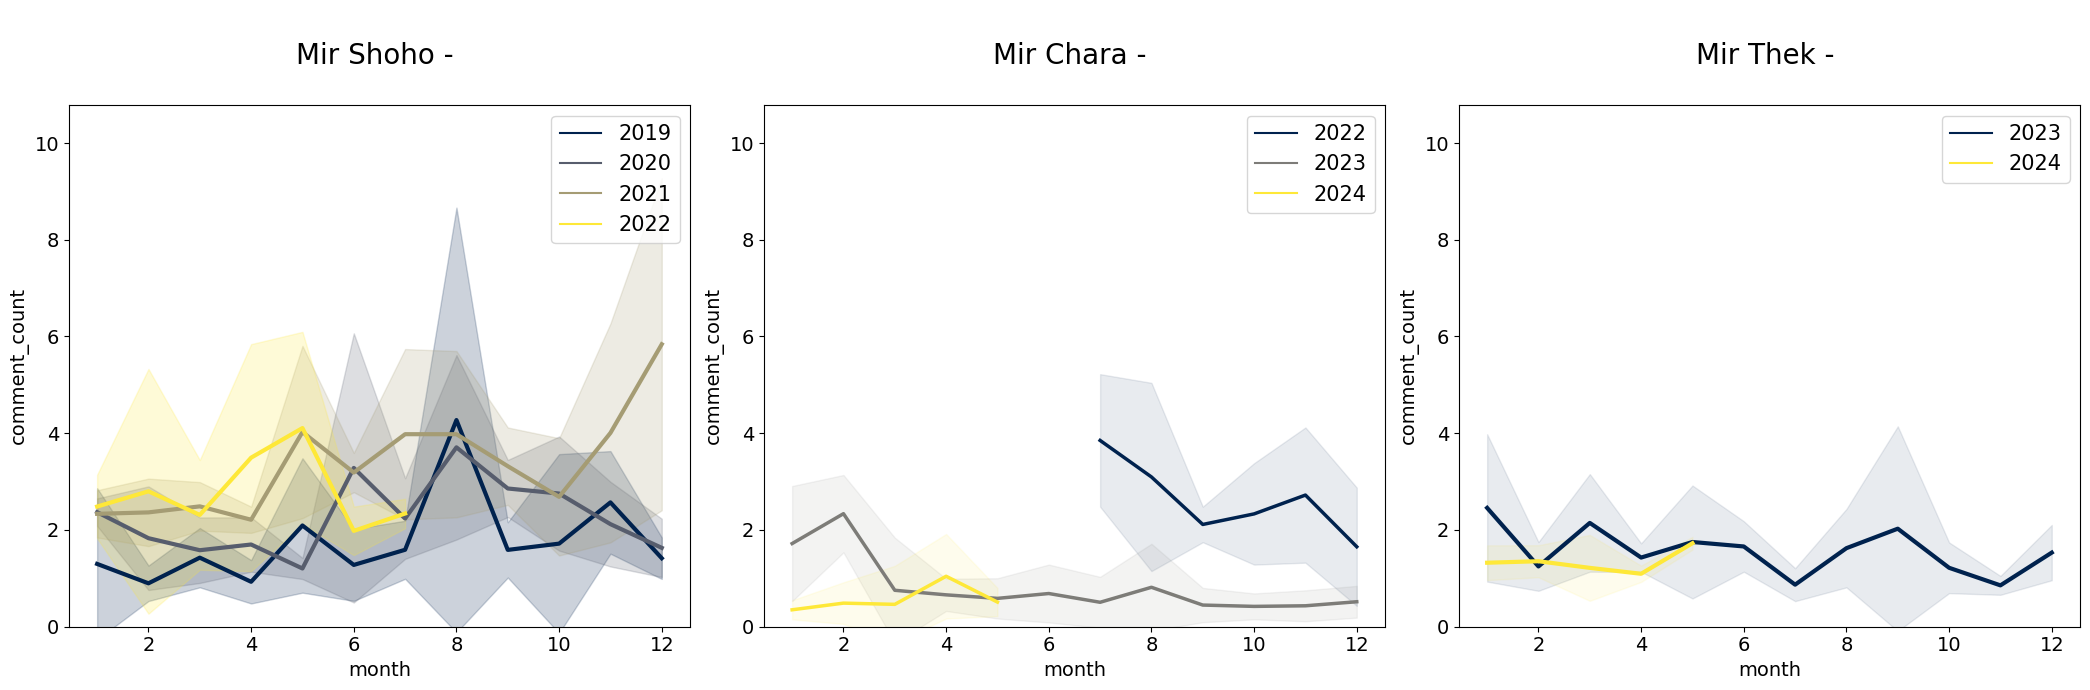

In [80]:
plot_2o('comment_count')

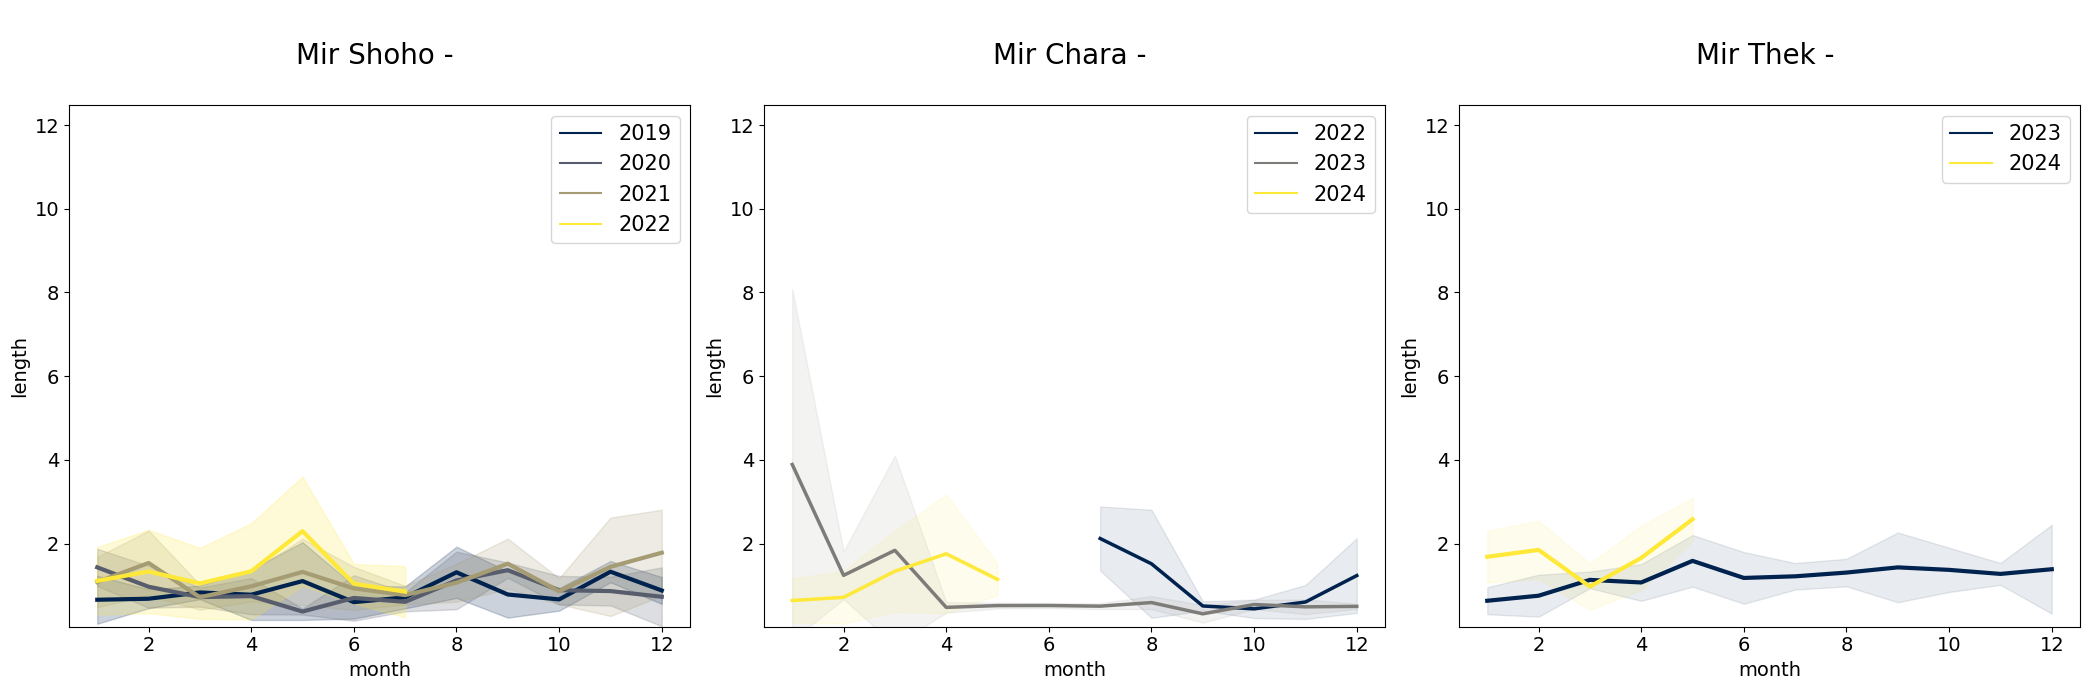

In [81]:
plot_2o('length')

## Principal Component Analysis (PCA):

* Reduces the dimensionality of the dataset while preserving as much variance as possible.
* Helps to identify underlying patterns and the most important features.


In [82]:
dfc.head(3)

title     views    length  \
0  Sunday Suspense | Professor Shonku | Compu | S...   434.508  0.877500   
1  Sunday Suspense Classics | Satyajit Ray Storie...   372.088  1.406111   
2  Sunday Suspense | Chowdhury Barir Rahasya | Ab...  1044.481  4.496667   

                                           url     video_id  comment_count  \
0  https://www.youtube.com/watch?v=SgqeN_FUprg  SgqeN_FUprg          0.715   
1  https://www.youtube.com/watch?v=w6a9wvFugT4  w6a9wvFugT4          0.304   
2  https://www.youtube.com/watch?v=hF6XlcgnE10  hF6XlcgnE10          2.539   

   video_likes       date      time  year  month  day  
0       11.275 2024-05-05  07:30:06  2024      5    5  
1        7.689 2024-05-04  16:30:07  2024      5    4  
2       22.110 2024-04-28  09:23:41  2024      4   28

In [83]:
df = dfc[numerical_cols].copy()
df.head(3)

views    length  comment_count  video_likes  year
0   434.508  0.877500          0.715       11.275  2024
1   372.088  1.406111          0.304        7.689  2024
2  1044.481  4.496667          2.539       22.110  2024

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-0.26208239, -0.03592411, -0.12563184, -0.21980701,  1.34864496],
       [-0.39616819,  0.39064382, -0.53795843, -0.56535592,  1.34864496],
       [ 1.04821425,  2.88459798,  1.70425549,  0.82425946,  1.34864496],
       ...,
       [ 2.45036675,  0.50720468,  2.07244006,  1.97808059, -1.96902163],
       [ 5.79624778,  1.66855436,  4.59756419,  4.0321019 , -1.96902163],
       [ 2.81058754,  0.72306644,  2.39146647,  2.87750989, -1.96902163]])

In [85]:
# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components based on your dataset
pca_result = pca.fit_transform(scaled_df)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df

PC1       PC2
0   -0.819078  0.314713
1   -1.273575  0.701385
2    1.581685  3.262788
3   -0.854425  0.200859
4   -0.158755  0.178485
..        ...       ...
241 -0.388312 -1.256225
242  5.979174  0.782408
243  4.230802  0.148507
244  8.540406  1.523462
245  5.099532  0.372022

[246 rows x 2 columns]

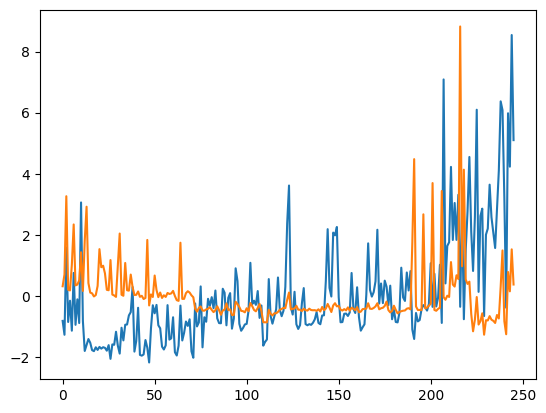

In [86]:
plt.plot(pca_df);

## Histograms

In [87]:

dfc.head(2)

title    views    length  \
0  Sunday Suspense | Professor Shonku | Compu | S...  434.508  0.877500   
1  Sunday Suspense Classics | Satyajit Ray Storie...  372.088  1.406111   

                                           url     video_id  comment_count  \
0  https://www.youtube.com/watch?v=SgqeN_FUprg  SgqeN_FUprg          0.715   
1  https://www.youtube.com/watch?v=w6a9wvFugT4  w6a9wvFugT4          0.304   

   video_likes       date      time  year  month  day  
0       11.275 2024-05-05  07:30:06  2024      5    5  
1        7.689 2024-05-04  16:30:07  2024      5    4

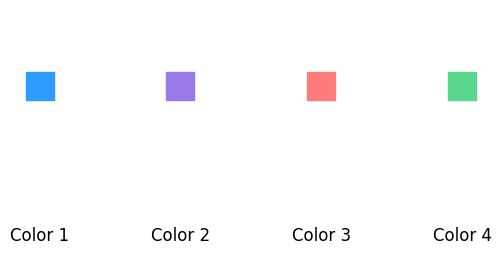

In [88]:
# Define the colors
colors = ['#2E9BFF', '#987BE9', '#FF7C7C', '#58D68D']

color_names = ['Color 1', 'Color 2', 'Color 3', 'Color 4']

# Create a figure
fig, ax = plt.subplots(figsize=(6, 2))

# Plot color samples
for i, (color, name) in enumerate(zip(colors, color_names)):
    ax.plot(i, 0, 's', markersize=20, color=color)
    ax.text(i, -0.1, name, ha='center', va='top', fontsize=12)

# Remove axes
ax.axis('off')

# Show the plot
plt.show()


In [89]:
!pip install aquarel catppuccin-matplotlib mplcyberpunk matplotx vapeplot
import mplcyberpunk
plt.style.use('cyberpunk')

  Obtaining dependency information for aquarel from https://files.pythonhosted.org/packages/3d/80/caa86f9707478d95986ae60166fc81ed680763caa4e2d8298cd5f9ce0ba1/aquarel-0.0.6-py3-none-any.whl.metadata
  Obtaining dependency information for catppuccin-matplotlib from https://files.pythonhosted.org/packages/f6/10/6534c239fabb5c9c7e1710db9a9c2231223b8624aa55de09d5f373bd8042/catppuccin_matplotlib-0.4-py3-none-any.whl.metadata
  Obtaining dependency information for mplcyberpunk from https://files.pythonhosted.org/packages/e5/71/224be8a821e38d71d603077630b36c89038d6295be4e7194219dd649ab60/mplcyberpunk-0.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for matplotx from https://files.pythonhosted.org/packages/95/ef/e8a30503ae0c26681a9610c7f0be58646bea8119b98cc65c47661abc27a3/matplotx-0.3.10-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Created wheel for vapeplot: filename=vapeplot-0.0.8-py3-none-any.whl size=11013 sha256=5efbdc012c5e75261ec30ceee8911c33256

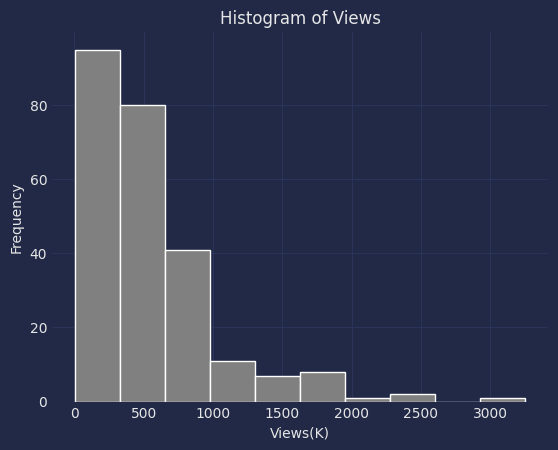

In [90]:
plt.hist(dfc['views'], bins=10, color='gray', edgecolor='white')  
# Set the title and labels
plt.title('Histogram of Views')
plt.xlabel('Views(K)')
plt.ylabel('Frequency')
plt.show();

In [91]:
def plot_4o(df, df2, df3):
    columns = ['views', 'comment_count', 'video_likes', 'length']
    titles = [
        'Histogram of Views',
        'Histogram of Comment Count (K)',
        'Histogram of Video Likes (K)',
        'Histogram of Length (Hr)'
    ]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    for i, (col, title) in enumerate(zip(columns, titles)):
        # Data from the first DataFrame
        data = df[col].tolist()
        counts, bin_edges = np.histogram(data, bins=50)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Data from the second DataFrame
        data2 = df2[col].tolist()
        counts2, bin_edges2 = np.histogram(data2, bins=50)
        bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
        
        # Data from the third DataFrame
        data3 = df3[col].tolist()
        counts3, bin_edges3 = np.histogram(data3, bins=50)
        bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2

        ax = axes[i // 2, i % 2]
        
        # Plot histograms for all three DataFrames
        ax.plot(bin_centers, counts, color='skyblue', linestyle='-', # marker='s', markersize=4, 
                markerfacecolor='black', label='MirSoho')

        ax.plot(bin_centers2, counts2, color=colors[1], linestyle='-', # marker='o', markersize=4,
                markerfacecolor='black', label='MirChara')

        ax.plot(bin_centers3, counts3, color=colors[2], linestyle='-', # marker='^', markersize=4,
                markerfacecolor='black', label='MirThek')


        ax.set_xlabel(f'{col.capitalize()} (K)')
        ax.set_ylabel('Frequency')
        ax.set_title(title)
        ax.grid(False)
        ax.legend(fontsize=15)  
    plt.tight_layout()
    plt.show()


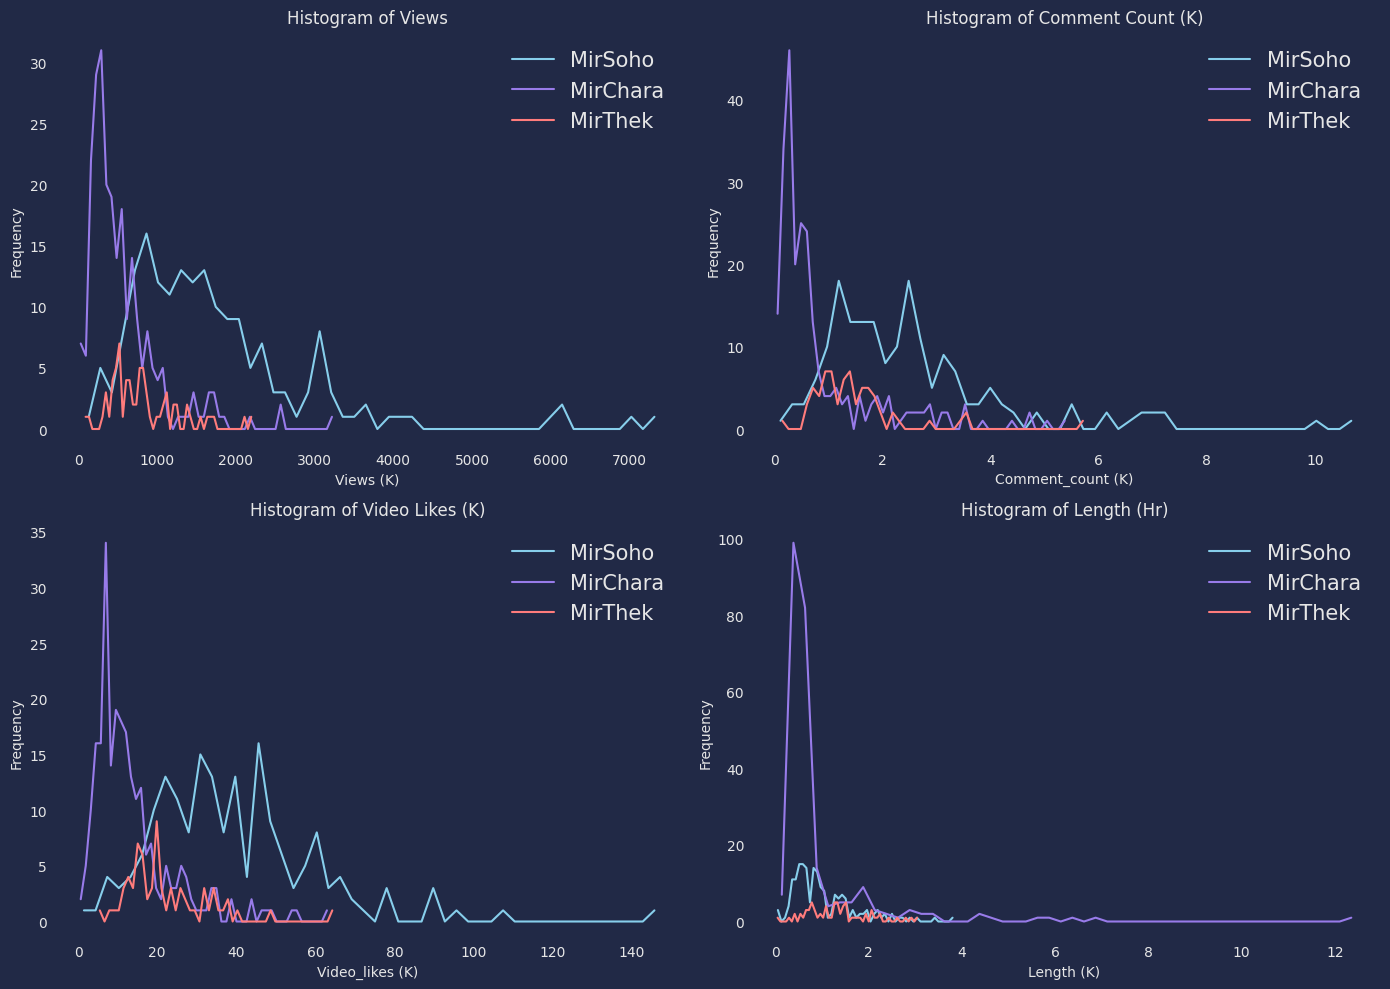

In [97]:
plot_4o(dfs, dfc, dft)

## Some More Analysis

### Named Color Palettes
1. **Deep**: `'deep'`
2. **Muted**: `'muted'`
3. **Pastel**: `'pastel'`
4. **Bright**: `'bright'`
5. **Dark**: `'dark'`
6. **Colorblind**: `'colorblind'`

### Built-In Color Schemes
1. **Viridis**: `'viridis'`
2. **Plasma**: `'plasma'`
3. **Inferno**: `'inferno'`
4. **Magma**: `'magma'`
5. **Cividis**: `'cividis'`
6. **Cubehelix**: `'cubehelix'`
7. **Accent**: `'Accent'`
8. **Set1**: `'Set1'`
9. **Set2**: `'Set2'`
10. **Set3**: `'Set3'`
11. **Spectral**: `'Spectral'`
12. **Coolwarm**: `'coolwarm'`
13. **RdBu**: `'RdBu'`
14. **RdYlBu**: `'RdYlBu'`
15. **PiYG**: `'PiYG'`

### Sequential Palettes
1. **Blues**: `'Blues'`
2. **BuGn**: `'BuGn'`
3. **BuPu**: `'BuPu'`
4. **GnBu**: `'GnBu'`
5. **Greens**: `'Greens'`
6. **Greys**: `'Greys'`
7. **Oranges**: `'Oranges'`
8. **OrRd**: `'OrRd'`
9. **PuBu**: `'PuBu'`
10. **PuBuGn**: `'PuBuGn'`
11. **PuRd**: `'PuRd'`
12. **Purples**: `'Purples'`
13. **RdPu**: `'RdPu'`
14. **Reds**: `'Reds'`
15. **YlGn**: `'YlGn'`
16. **YlGnBu**: `'YlGnBu'`
17. **YlOrBr**: `'YlOrBr'`
18. **YlOrRd**: `'YlOrRd'`

### Diverging Palettes
1. **BrBG**: `'BrBG'`
2. **PRGn**: `'PRGn'`
3. **PuOr**: `'PuOr'`
4. **RdGy**: `'RdGy'`
5. **RdYlGn**: `'RdYlGn'`
6. **Spectral**: `'Spectral'`
7. **coolwarm**: `'coolwarm'`
8. **bwr**: `'bwr'`
9. **seismic**: `'seismic'`

In [142]:
f1 = dfs[dfs['year'] == 2021].copy()
f2 = dfc[dfc['year'] == 2023].copy()
f3 = dft[dft['year'] == 2023].copy()

print(f"{f1.shape} {f2.shape} {f3.shape}")

(52, 12) (148, 12) (50, 12)


In [94]:
f1.head(2)

title     views    length  \
28  #SundaySuspense | Aranyer Prachin Probad | Sou...  2615.308  1.321389   
29  #SundaySuspense | Bongshaler Bonolota | Md. Al...  1201.048  0.651667   

                                            url     video_id  comment_count  \
28  https://www.youtube.com/watch?v=6qhjWg4O4jc  6qhjWg4O4jc          3.749   
29  https://www.youtube.com/watch?v=bxYj8nwchgw  bxYj8nwchgw          2.493   

    video_likes       date      time  year  month  day  
28       67.652 2021-12-26  07:30:14  2021     12   26  
29       35.130 2021-12-19  07:30:10  2021     12   19

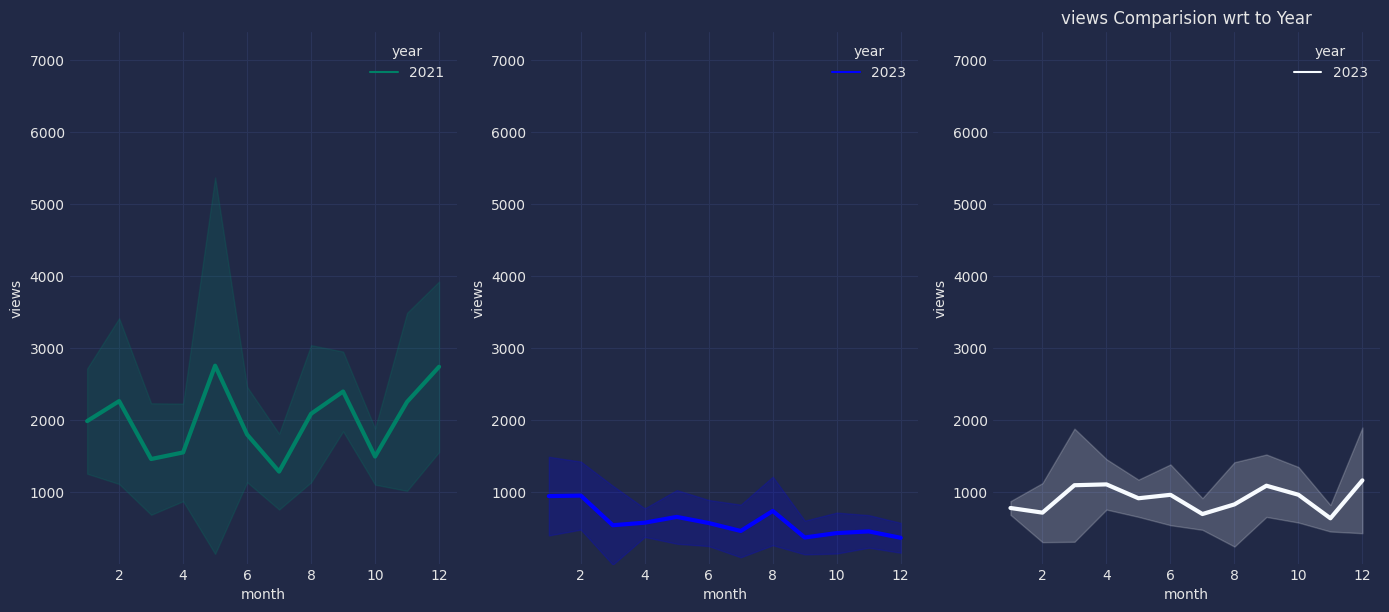

In [114]:
yax = 'views'

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Calculate global min and max for the y-axis
global_min = min(f1[yax].min(), f2[yax].min(), f3[yax].min())
global_max = max(f1[yax].max(), f2[yax].max(), f3[yax].max())

sns.lineplot(data=f1, x='month', y=yax, hue='year', palette='summer', ax=axes[0],
             errorbar='sd', err_style='band', linewidth=3)
sns.lineplot(data=f2, x='month', y=yax, hue='year', palette='winter', ax=axes[1],
             errorbar='sd', err_style='band', linewidth=3)
sns.lineplot(data=f3, x='month', y=yax, hue='year', palette='Blues', ax=axes[2],
             errorbar='sd', err_style='band', linewidth=3)

for ax in axes:
    ax.set_ylim(global_min, global_max)

plt.tight_layout()
plt.title(f'{yax} Comparision wrt to Year')
plt.show()


In [99]:
f1.head(2)

title     views    length  \
28  #SundaySuspense | Aranyer Prachin Probad | Sou...  2615.308  1.321389   
29  #SundaySuspense | Bongshaler Bonolota | Md. Al...  1201.048  0.651667   

                                            url     video_id  comment_count  \
28  https://www.youtube.com/watch?v=6qhjWg4O4jc  6qhjWg4O4jc          3.749   
29  https://www.youtube.com/watch?v=bxYj8nwchgw  bxYj8nwchgw          2.493   

    video_likes       date      time  year  month  day  
28       67.652 2021-12-26  07:30:14  2021     12   26  
29       35.130 2021-12-19  07:30:10  2021     12   19

In [156]:
def fire_flux(col):
    # Aggregate the data by summing 'views' for each 'month' and 'year'
    f1_sum = f1.groupby(['month', 'year'], as_index=False)[f'{col}'].mean()
    if col == 'views':
        f1_sum[f'{col}'] = f1_sum[f'{col}']/1000
    f1_sum[f'cumulative_{col}'] = f1_sum[f'{col}'].cumsum()

    # Aggregate the data by summing 'views' for each 'month' and 'year'
    f2_sum = f2.groupby(['month', 'year'], as_index=False)[f'{col}'].mean()
    if col == 'views':
        f2_sum[f'{col}'] = f2_sum[f'{col}']/1000
    f2_sum[f'cumulative_{col}'] = f2_sum[f'{col}'].cumsum()

    # Aggregate the data by summing 'views' for each 'month' and 'year'
    f3_sum = f3.groupby(['month', 'year'], as_index=False)[f'{col}'].mean()
    if col == 'views':
        f3_sum[f'{col}'] = f3_sum[f'{col}']/1000
    f3_sum[f'cumulative_{col}'] = f3_sum[f'{col}'].cumsum()
    
    return f1_sum, f2_sum, f3_sum

In [160]:
col = 'views'
f1_sum, f2_sum, f3_sum = fire_flux(f'{col}')
f3_sum

month  year     views  cumulative_views
0       1  2023  0.773858          0.773858
1       2  2023  0.709360          1.483218
2       3  2023  1.090276          2.573494
3       4  2023  1.101827          3.675320
4       5  2023  0.908992          4.584312
5       6  2023  0.956959          5.541271
6       7  2023  0.690067          6.231338
7       8  2023  0.823744          7.055082
8       9  2023  1.083344          8.138426
9      10  2023  0.957761          9.096187
10     11  2023  0.630770          9.726956
11     12  2023  1.157860         10.884817

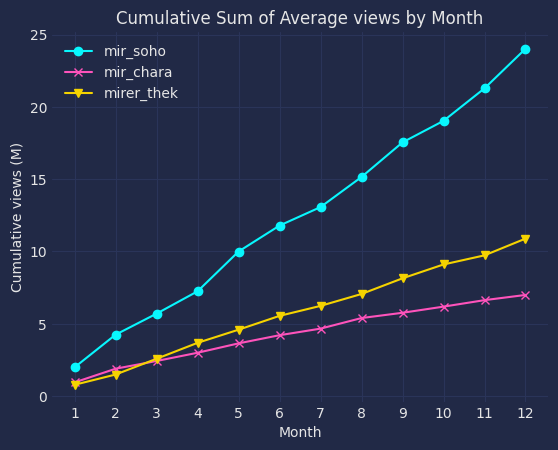

In [161]:
plt.plot(f1_sum['month'], f1_sum[f'cumulative_{col}'], marker='o')
plt.plot(f2_sum['month'], f2_sum[f'cumulative_{col}'], marker='x')
plt.plot(f3_sum['month'], f3_sum[f'cumulative_{col}'], marker='v')


# Set the title and labels
plt.title(f'Cumulative Sum of Average {col} by Month')
plt.xlabel('Month')
plt.ylabel(f'Cumulative {col} (M)')

# Rotate month labels for better readability
plt.xticks(np.arange(1,13))
plt.legend(['mir_soho', 'mir_chara', 'mirer_thek'])

# Show the plot
plt.show()

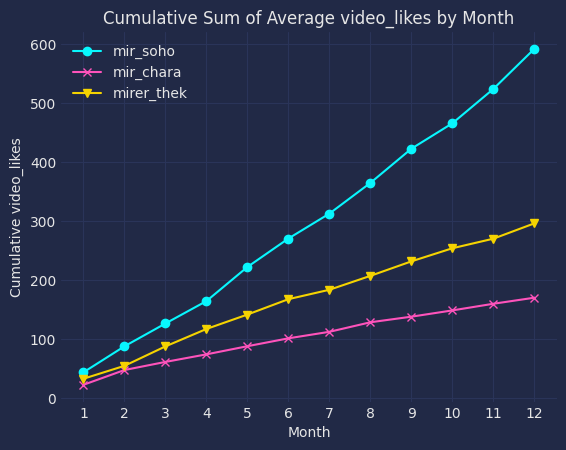

In [162]:
col = 'video_likes'
f1_sum, f2_sum, f3_sum = fire_flux(f'{col}')

plt.plot(f1_sum['month'], f1_sum[f'cumulative_{col}'], marker='o')
plt.plot(f2_sum['month'], f2_sum[f'cumulative_{col}'], marker='x')
plt.plot(f3_sum['month'], f3_sum[f'cumulative_{col}'], marker='v')


# Set the title and labels
plt.title(f'Cumulative Sum of Average {col} by Month')
plt.xlabel('Month')
plt.ylabel(f'Cumulative {col}')

# Rotate month labels for better readability
plt.xticks(np.arange(1,13))
plt.legend(['mir_soho', 'mir_chara', 'mirer_thek'])

# Show the plot
plt.show()

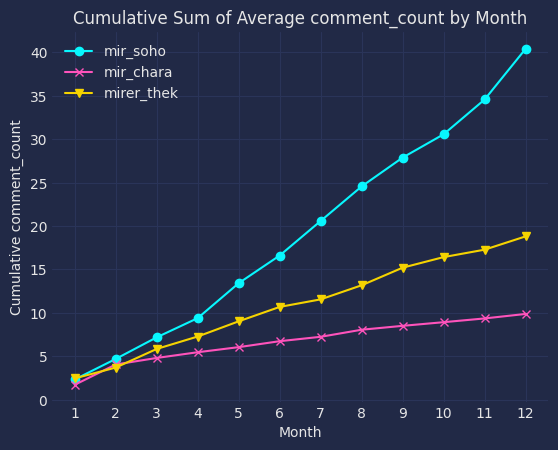

In [164]:
col = 'comment_count'
f1_sum, f2_sum, f3_sum = fire_flux(f'{col}')

plt.plot(f1_sum['month'], f1_sum[f'cumulative_{col}'], marker='o')
plt.plot(f2_sum['month'], f2_sum[f'cumulative_{col}'], marker='x')
plt.plot(f3_sum['month'], f3_sum[f'cumulative_{col}'], marker='v')


# Set the title and labels
plt.title(f'Cumulative Sum of Average {col} by Month')
plt.xlabel('Month')
plt.ylabel(f'Cumulative {col}')

# Rotate month labels for better readability
plt.xticks(np.arange(1,13))
plt.legend(['mir_soho', 'mir_chara', 'mirer_thek'])

# Show the plot
plt.show()

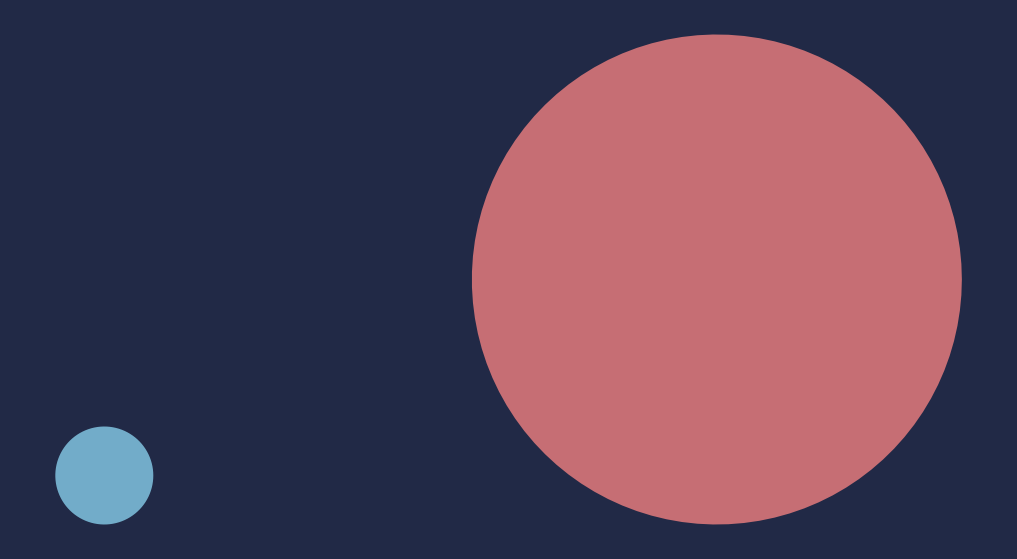

In [174]:
radii = {'cat1': 2, 'cat2': 10}
colors = {'cat1': 'skyblue', 'cat2': 'lightcoral'}

fig, ax = plt.subplots(figsize=(20, 7))
theta = np.linspace(0, 2 * np.pi, 100)

# # Create gradient background
# gradient = np.linspace(0, 1, 256)
# gradient = np.vstack((gradient, gradient))
# extent = [-10, 40, -15, 15]  
# ax.imshow(gradient, aspect='auto', cmap='Blues', extent=extent, alpha=0.4)



gap = 15  # Adjust this value to increase or decrease the gap
y_center = radii['cat2']  # Align by the largest radius

for i, (category, radius) in enumerate(radii.items()):
    x_center = i * ( radii['cat2'] + gap)  # Calculate x position with gap
    x = radius * np.cos(theta) + x_center
    y = radius * np.sin(theta) - (y_center - radius)  # Align diameters
    ax.fill(x, y, colors[category], alpha=0.8, label=f'{category} (radius={radius})')

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Adding labels and title
# ax.set_title('Side by Side Circles with Different Radii for Two Categories')
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_ylim([-12, 15])
ax.set_xticks([])
ax.set_yticks([])



# Add legend
# ax.legend()

plt.show()


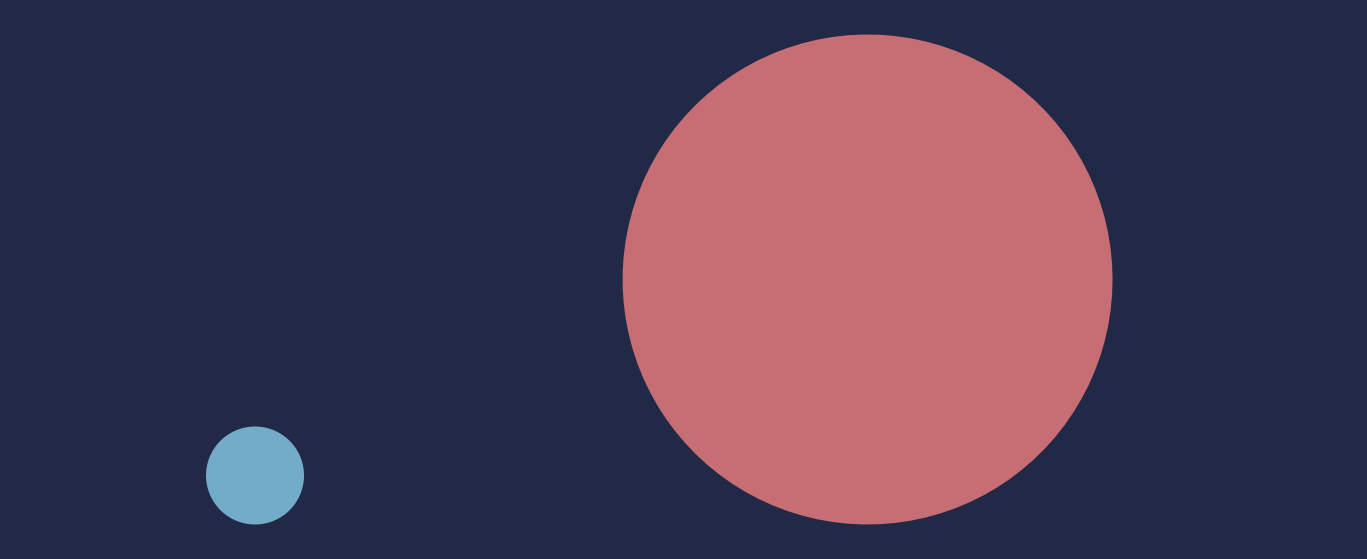

In [183]:
radii = {'cat1': 2, 'cat2': 10}
colors = {'cat1': 'skyblue', 'cat2': 'lightcoral'}

fig, ax = plt.subplots(figsize=(20, 7))
theta = np.linspace(0, 2 * np.pi, 100)



gap = 5  # Adjust this value to increase or decrease the gap
y_center = radii['cat2']  # Align by the largest radius

for i, (category, radius) in enumerate(radii.items()):
    x_center = i * ( 2 * radii['cat2'] + gap)  # Calculate x position with gap
#     print(x_center)
    x = radius * np.cos(theta) + x_center
    y = radius * np.sin(theta) - (y_center - radius)  # Align diameters
    ax.fill(x, y, colors[category], alpha=0.8, label=f'{category} (radius={radius})')

    
    
# Set the aspect of the plot to be equal
ax.set_aspect('equal')
ax.set_xlim([-10, 45])
ax.set_xticks([])
ax.set_yticks([])

plt.show()


In [186]:
col = 'views'
f1_sum, f2_sum, f3_sum = fire_flux(f'{col}')
f1_sum['cumulative_views'][11]

24.015197

In [188]:
f2_sum['cumulative_views'][11], f3_sum['cumulative_views'][11]

(6.9875142494921745, 10.884816750000002)

0.0
63.030394


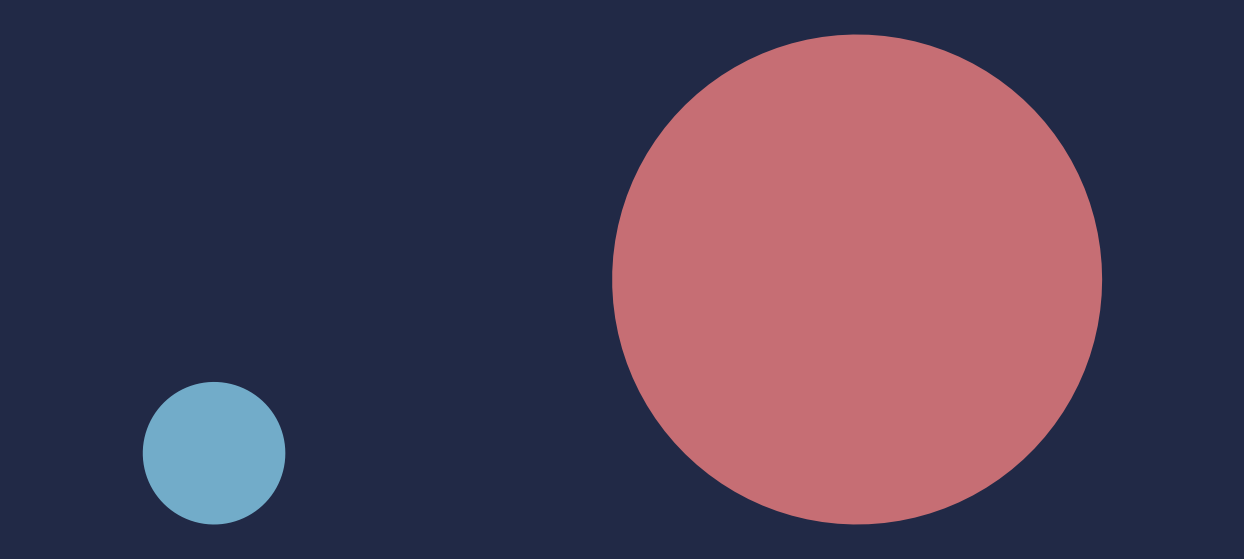

In [196]:
radii = {'mir_chara': f2_sum['cumulative_views'][11], 'mir_soho': f1_sum['cumulative_views'][11]}
colors = {'mir_chara': 'skyblue', 'mir_soho': 'lightcoral'}

fig, ax = plt.subplots(figsize=(20, 7))
theta = np.linspace(0, 2 * np.pi, 100)



gap = 15  # Adjust this value to increase or decrease the gap
y_center = radii['mir_soho']  # Align by the largest radius

for i, (category, radius) in enumerate(radii.items()):
    x_center = i * ( 2 * radii['mir_soho'] + gap)  # Calculate x position with gap
    print(x_center)
    x = radius * np.cos(theta) + x_center
    y = radius * np.sin(theta) - (y_center - radius)  # Align diameters
    ax.fill(x, y, colors[category], alpha=0.8, label=f'{category} (radius={radius})')

    
    
# Set the aspect of the plot to be equal
ax.set_aspect('equal')
ax.set_xlim([-20, 100])
ax.set_xticks([])
ax.set_yticks([])

plt.show()


In [199]:
col = 'video_likes'
f1_sum, f2_sum, f3_sum = fire_flux(f'{col}')
f1_sum['cumulative_video_likes'][11], f2_sum['cumulative_video_likes'][11], 

(592.32435, 170.5478950660451)

0.0
16.846487


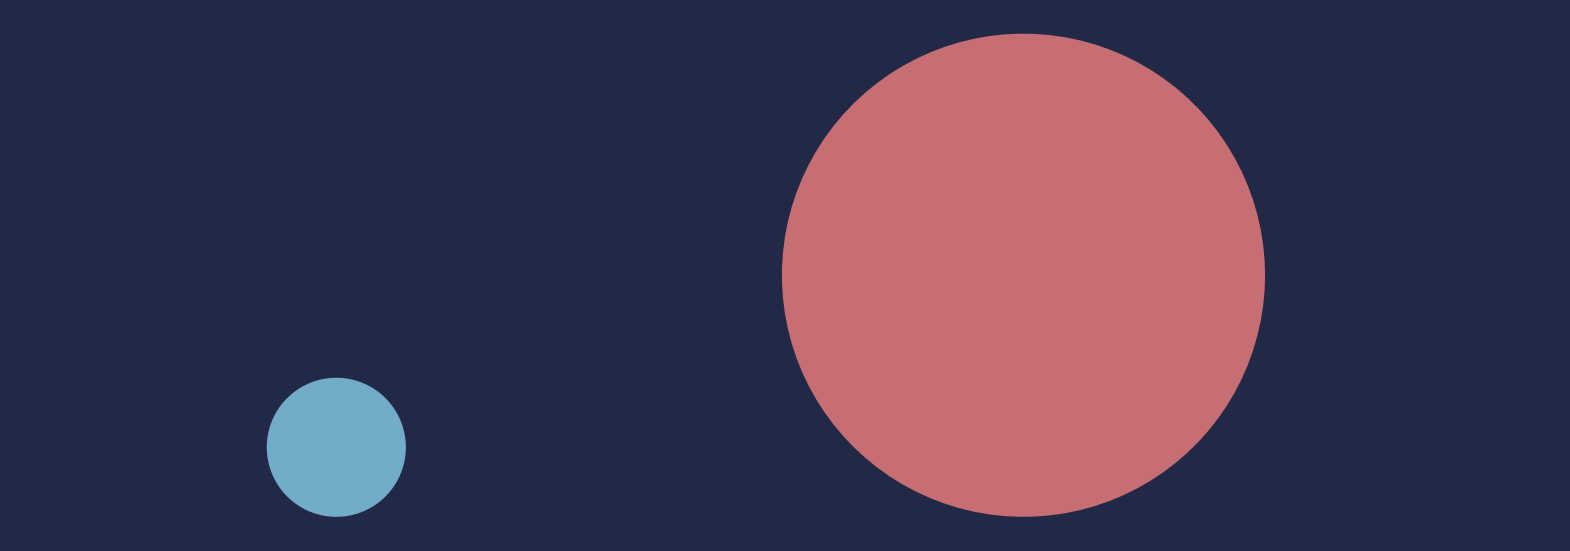

In [205]:
radii = {'mir_chara': f2_sum['cumulative_video_likes'][11]/100, 'mir_soho': f1_sum['cumulative_video_likes'][11]/100}
colors = {'mir_chara': 'skyblue', 'mir_soho': 'lightcoral'}

fig, ax = plt.subplots(figsize=(20, 7))
theta = np.linspace(0, 2 * np.pi, 100)



gap = 5  # Adjust this value to increase or decrease the gap
y_center = radii['mir_soho']  # Align by the largest radius

for i, (category, radius) in enumerate(radii.items()):
    x_center = i * ( 2 * radii['mir_soho'] + gap)  # Calculate x position with gap
    print(x_center)
    x = radius * np.cos(theta) + x_center
    y = radius * np.sin(theta) - (y_center - radius)  # Align diameters
    ax.fill(x, y, colors[category], alpha=0.8, label=f'{category} (radius={radius})')

    
    
# Set the aspect of the plot to be equal
ax.set_aspect('equal')
ax.set_xlim([-8, 30])
ax.set_xticks([])
ax.set_yticks([])

plt.show()


(28, 12) (26, 12) (50, 12)


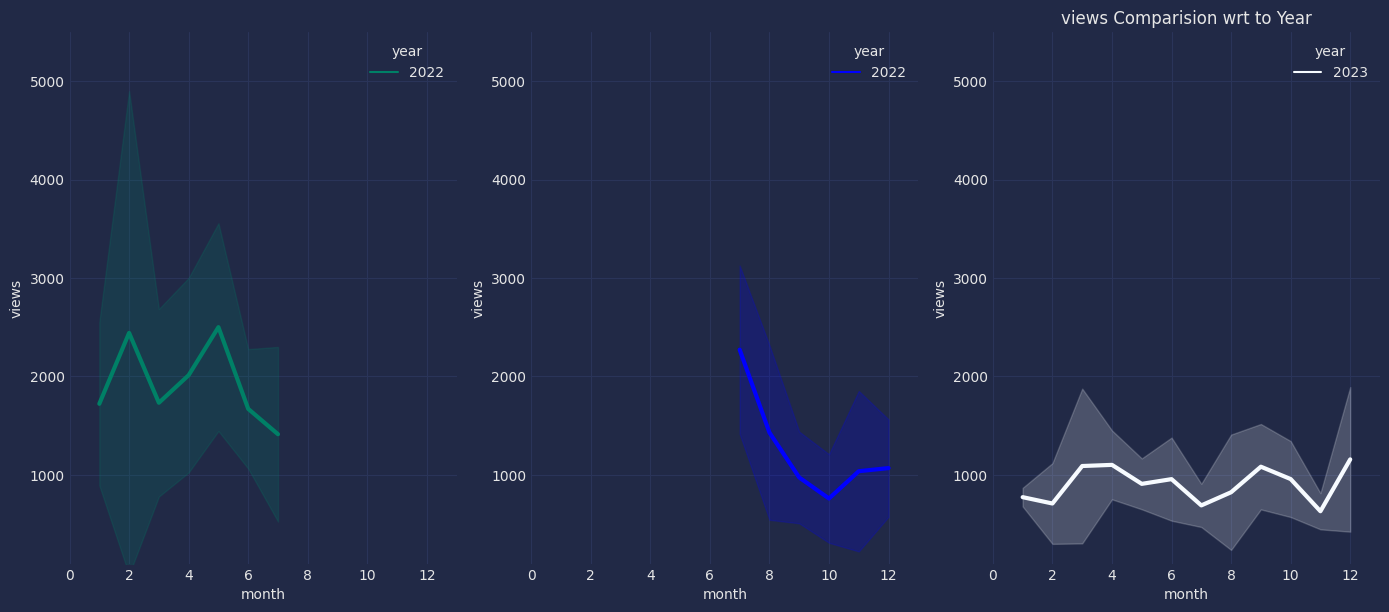

In [96]:
f1 = dfs[dfs['year'] == 2022].copy()
f2 = dfc[dfc['year'] == 2022].copy()
f3 = dft[dft['year'] == 2023].copy()

print(f"{f1.shape} {f2.shape} {f3.shape}")

yax = 'views'

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Calculate global min and max for the y-axis
global_min = min(f1[yax].min(), f2[yax].min(), f3[yax].min())
global_max = max(f1[yax].max(), f2[yax].max(), f3[yax].max())

sns.lineplot(data=f1, x='month', y=yax, hue='year', palette='summer', ax=axes[0],
             errorbar='sd', err_style='band', linewidth=3)
sns.lineplot(data=f2, x='month', y=yax, hue='year', palette='winter', ax=axes[1],
             errorbar='sd', err_style='band', linewidth=3)
sns.lineplot(data=f3, x='month', y=yax, hue='year', palette='Blues', ax=axes[2],
             errorbar='sd', err_style='band', linewidth=3)

for ax in axes:
    ax.set_ylim(global_min, 5500)
    ax.set_xlim(0, 13)


plt.tight_layout()
plt.title(f'{yax} Comparision wrt to Year')
plt.show()


In [ ]:
dfs['views'].max()

In [ ]:
ax = sns.lineplot(data=dfc, x='year', y='video_likes', hue='month', 
                  palette = 'magma', errorbar=None, err_style='band', err_kws={'alpha': 0.05}, marker='x')
ax.axes.set_title("\nMir Shoho\n",fontsize=20);

In [ ]:
# xd = dfc[dfc['year'] == 2024]
# xd = xd[xd['month'] == 3]

# print(xd.shape)
# xd.head()

In [ ]:
v = xd.views.tolist()
m = xd.month.tolist()

v[:10], m[:10]

In [ ]:
xd.describe()

In [ ]:
# Aggregate the data by summing 'views' for each 'month' and 'year'
dfc_sum = dfc.groupby(['month', 'year'], as_index=False)['views'].sum()

# Creating the line plot for the sum of views
sns.lineplot(data=dfc_sum, x='month', y='views', hue='year', palette='cividis', errorbar='sd');
plt.show()

In [ ]:
dfc_sum

In [88]:
df  = pd.read_csv('/kaggle/input/media-study2-0/final_comment_data/mirer_thek_comment.csv')


df.head()

author published_date published_time  like_count  \
0      @anwarulkabir6319     2024-05-16        03:37:0           0   
1     @JayitaKundu-fy3hp     2024-05-11        11:22:1           0   
2              @subi4098     2024-05-04        05:24:3           0   
3     @samhotibanerjee95     2024-05-03        10:19:4           0   
4  @malabikasengupta9803     2024-04-29        11:26:0           0   

                                                text     video_id  public  
0                                      Thanks Mr.mir  EcIDh5OEOyo    True  
1  বিভূতিভূষণ বন্দ্যোপাধ্যায় এর আদৰ্শ হিন্দু হোটে...  EcIDh5OEOyo    True  
2  .vison boro fan tomar ami..mirchi te tomar gol...  EcIDh5OEOyo    True  
3  এতো স্ট্রোরি টেলার আছে yt channel এ কিন্তু মীর...  EcIDh5OEOyo    True  
4  Khub bhalo laglo Mir.\nMone hochilo golper mod...  EcIDh5OEOyo    True